<a href="https://colab.research.google.com/github/Habib-103/Bi-Variate-Analysis/blob/main/unsupervised_learning%20best_valued_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# best-valued house

**Project Describtion and Goal**

The melborn house dataset is about house prices with different house characteristics such as price, landsize,its area, type, etc.

the main task here is to find the categories of valued-house for the customers. by this way the customers can see is this house a valued-house to purchase or not.

to do that we need to use different features:

 not only *price* but the *land size*, the *suburb area*, *the number of rooms,* *house type*, its *distance from the Centeral Business District*, its *postcode area*, number of *bathrooms* and *bedrooms*, *car parking lots*, *buidling age*, *region name*, and the *building area*  

we are using unsupervised machine learning models and tools specifically K-Means, PCA, T-NSE, SVD, and DBSCAN to put them into clusters or groups. we compare the results of the models and will select the best perfomance among.

to check the model performance we need to do test such as:

- silhouttee score
- Davies-Bouldin Index
- Calinski-Harabasz Index

then we need to plot the house categories in the map and see which most value-houses where located and the users should be able to find it.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [6]:
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [7]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
df.isnull().any().sum()

4

In [9]:
df["CouncilArea"] = df["CouncilArea"].fillna(method='ffill')

<ipython-input-9-ddae5eacb9e8>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["CouncilArea"] = df["CouncilArea"].fillna(method='ffill')


In [10]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().any().sum()

0

In [13]:
len(df)

6830

In [14]:
df.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019


In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019


In [17]:
#we don't need these columns since they are not benficial to our models at all
df.drop(["SellerG","Date", "Method", "Propertycount", "Address"], axis=1, inplace=True)

In [18]:
df.head(1)

,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,2,h,1035000,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan


In [19]:
df["Price_per_sqft"] = df["Price"] / df["Landsize"]

In [20]:
df["House_Age"] = 2025 - df["YearBuilt"]

In [21]:
df.drop(["YearBuilt", "Price"], axis=1, inplace=True)

In [22]:
df.head(1)

,Suburb,Rooms,Type,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Price_per_sqft,House_Age
0,Abbotsford,2,h,2.5,3067,2,1,0.0,156,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,6634.615385,125.0


In [23]:
#change categorical to numerical
# "Suburb", "Type", "CouncilArea", "Regionname"

In [24]:
# Define categorical columns to encode
categorical_cols = ["Suburb", "Type", "CouncilArea", "Regionname"]

In [25]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [26]:
# Apply One-Hot Encoding
encoded_cols = encoder.fit_transform(df[categorical_cols])

In [27]:
# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

In [28]:
# Create a new DataFrame with both original and encoded columns
new_df = pd.concat([df, encoded_df], axis=1)

In [29]:
new_df.head(1)

,Suburb,Rooms,Type,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,Abbotsford,2,h,2.5,3067,2,1,0.0,156,79.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df.shape

(6830, 16)

In [31]:
new_df.shape

(6830, 358)

In [32]:
# Select only numerical columns
df1 = new_df.select_dtypes(include=['float64', 'int64'])

In [33]:
df1.shape

(6830, 354)

In [34]:
#these 4 columns removed # "Suburb", "Type", "CouncilArea", "Regionname"

In [35]:
df1.head(1)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,2.5,3067,2,1,0.0,156,79.0,-37.8079,144.9934,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df1.isnull().any().sum()

0

In [37]:
#"Rooms",	"Price",	"Distance",	"Postcode", 	"Bedroom2",	"Bathroom", 	"Car",	"Landsize","BuildingArea",	"Lattitude",	"Longtitude"
outlier_columns = ["Rooms",	"Distance", "Bedroom2",	"Bathroom",	"Car",	"Landsize", "BuildingArea",	"Price_per_sqft",	"House_Age"]

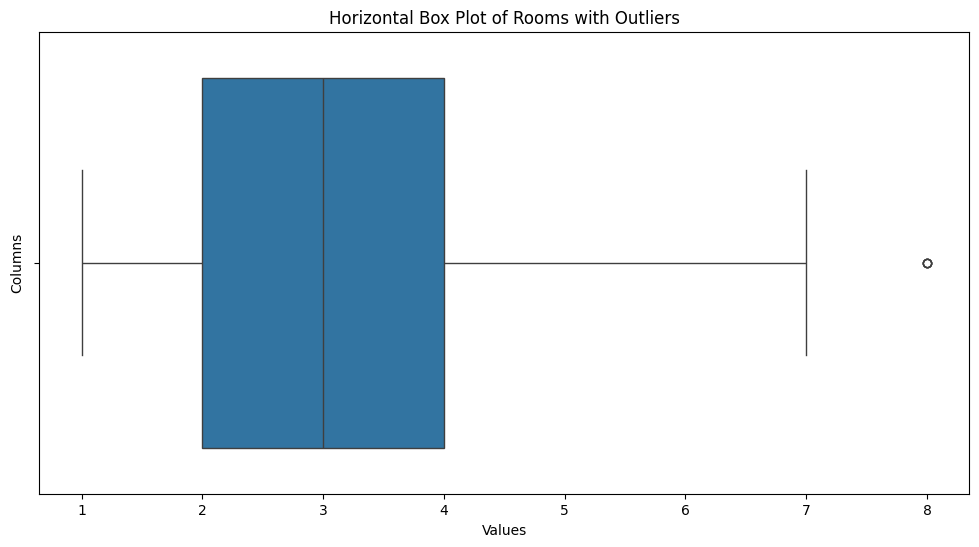

In [38]:
#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1["Rooms"], orient='h')
plt.title("Horizontal Box Plot of Rooms with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

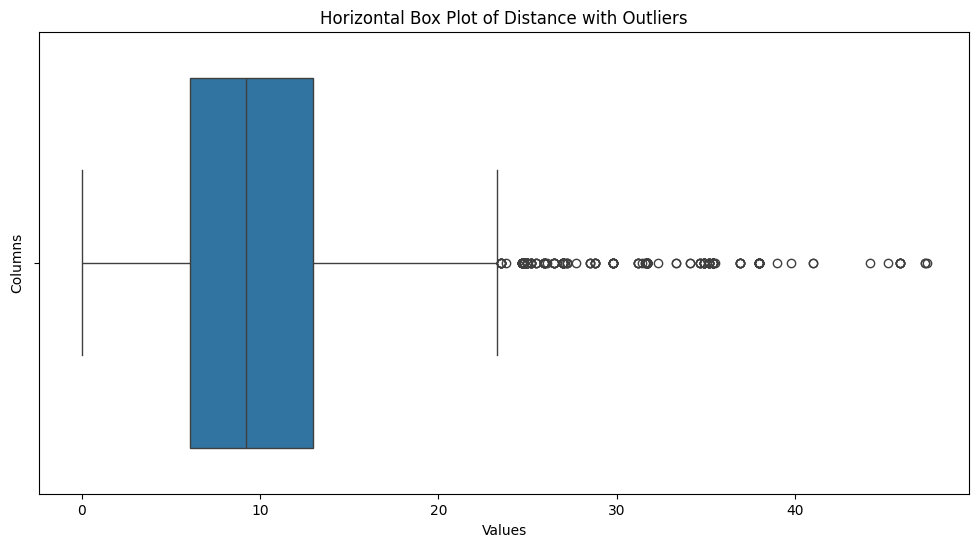

In [39]:
#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1["Distance"], orient='h')
plt.title("Horizontal Box Plot of Distance with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

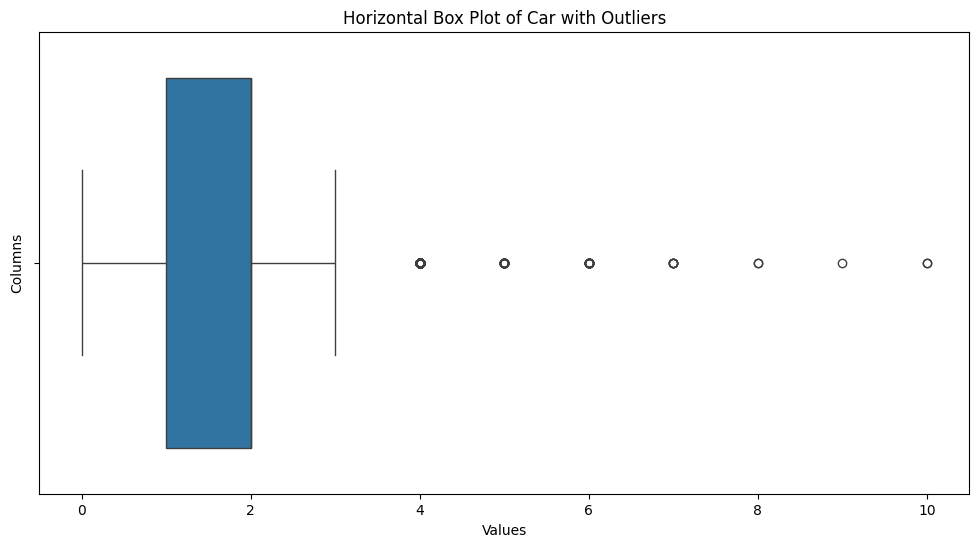

In [40]:
"Bathroom"

#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1["Car"], orient='h')
plt.title("Horizontal Box Plot of Car with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

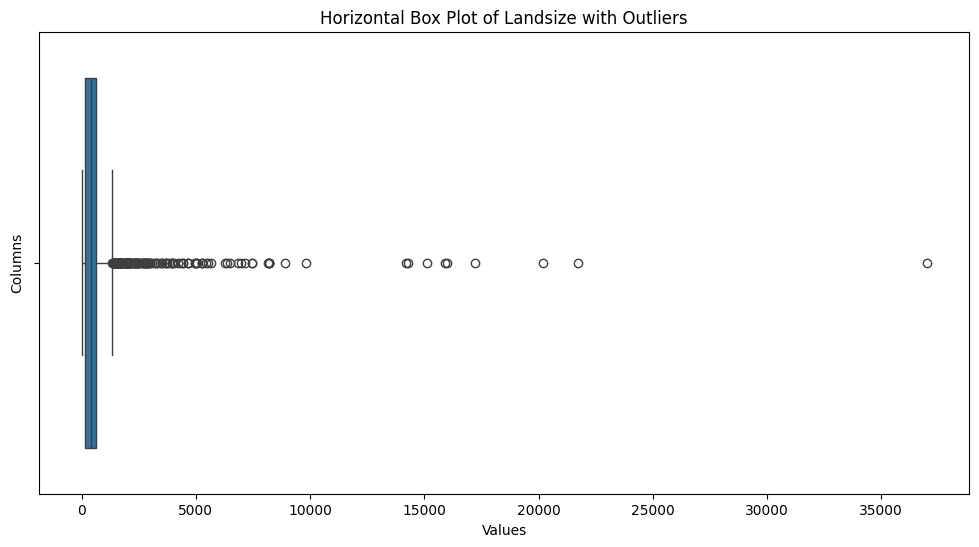

In [41]:
#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1["Landsize"], orient='h')
plt.title("Horizontal Box Plot of Landsize with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

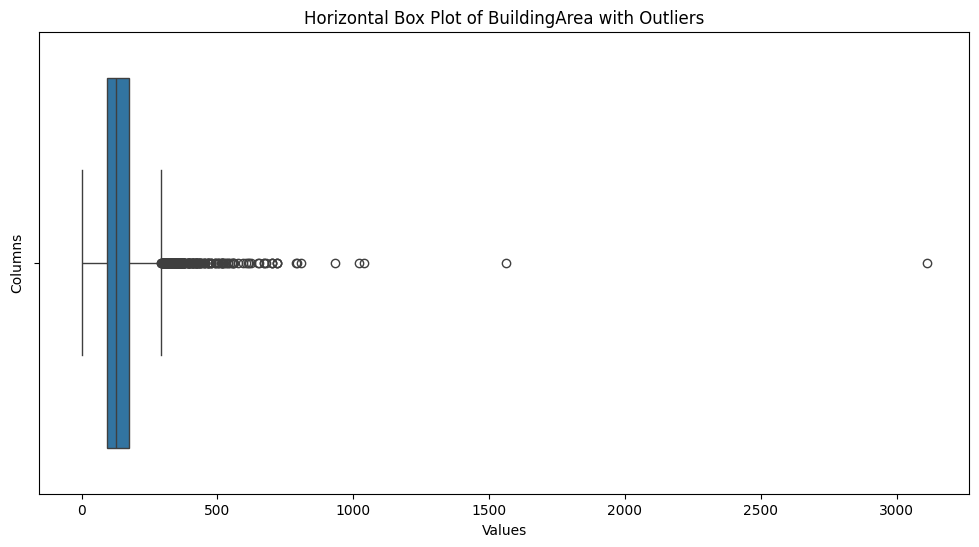

In [42]:
#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1["BuildingArea"], orient='h')
plt.title("Horizontal Box Plot of BuildingArea with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

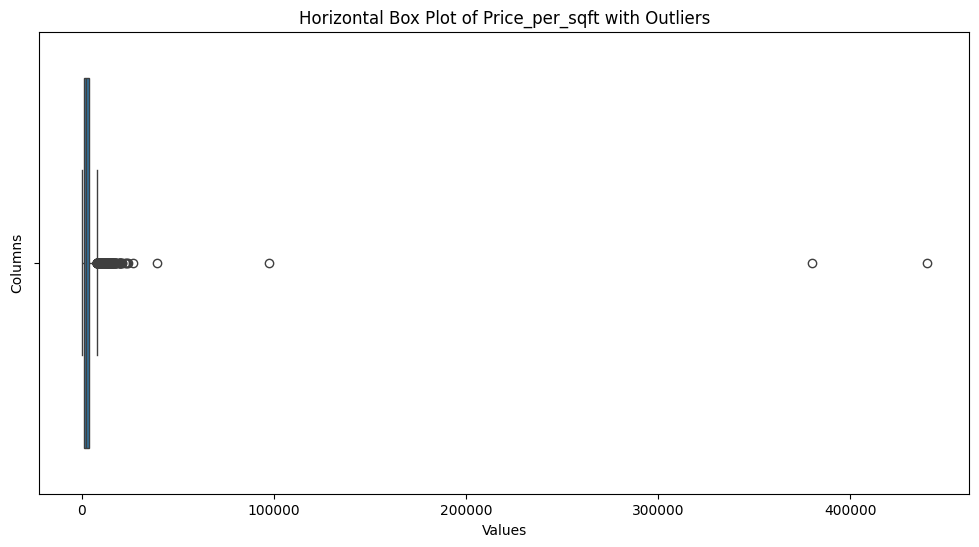

In [43]:
#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1["Price_per_sqft"], orient='h')
plt.title("Horizontal Box Plot of Price_per_sqft with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

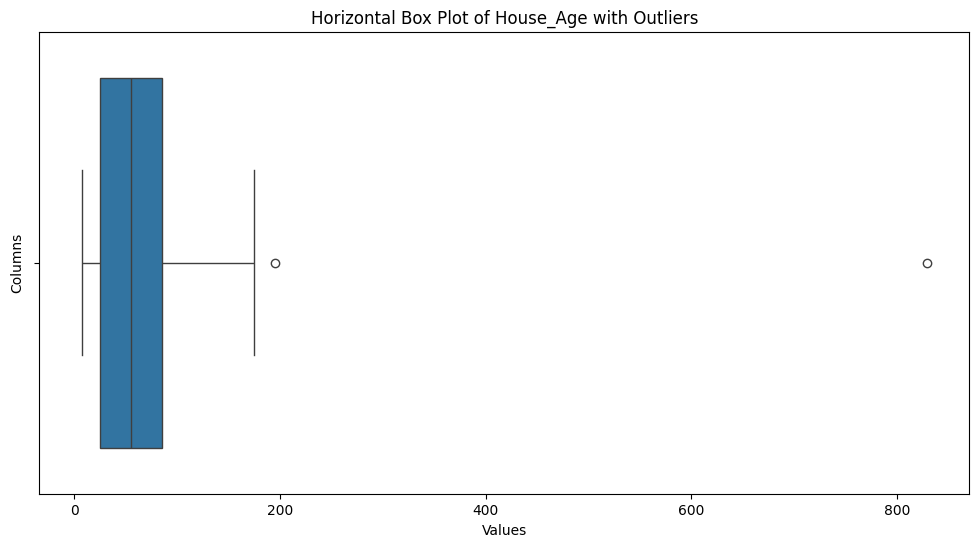

In [44]:
#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1["House_Age"], orient='h')
plt.title("Horizontal Box Plot of House_Age with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

In [45]:
def remove_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define the outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [46]:
# Remove outliers from the specified columns
cleaned_df = remove_outliers(df1, outlier_columns)

In [47]:
cleaned_df

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,2.5,3067,2,1,0.0,156,79.0,-37.80790,144.99340,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3,2.5,3067,3,2,0.0,134,150.0,-37.80930,144.99440,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4,2.5,3067,3,1,2.0,120,142.0,-37.80720,144.99410,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,2.5,3067,4,2,0.0,245,210.0,-37.80240,144.99930,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,2.5,3067,2,1,2.0,256,107.0,-37.80600,144.99540,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6824,4,14.7,3152,4,2,2.0,717,191.0,-37.86887,145.22116,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6825,2,14.5,3087,2,1,1.0,210,79.0,-37.70657,145.07878,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6826,4,14.7,3030,4,2,1.0,662,172.0,-37.89327,144.64789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6827,3,6.8,3016,3,2,2.0,333,133.0,-37.85927,144.87904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


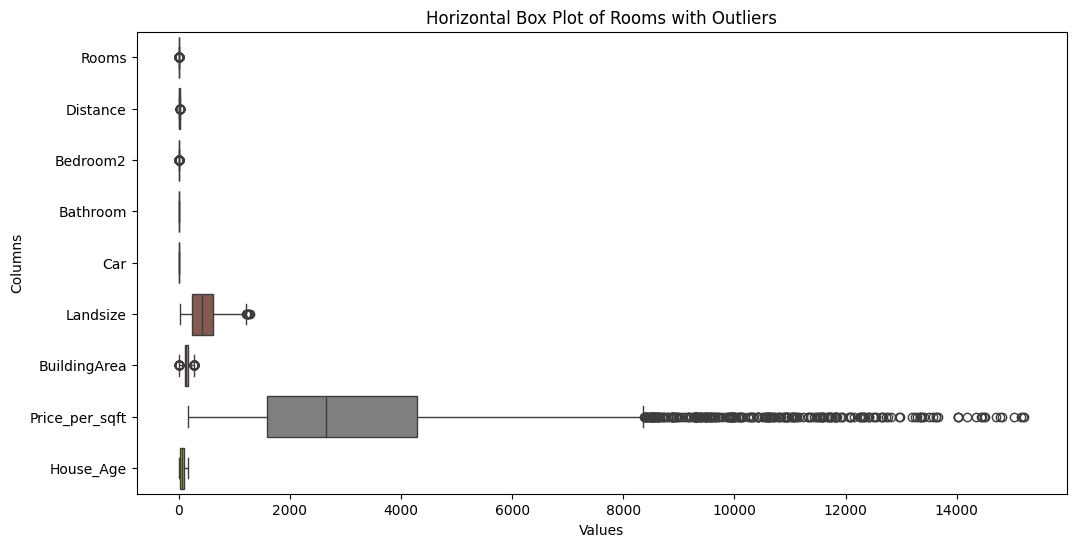

In [48]:
#outliers
# Create a horizontal boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df[outlier_columns], orient='h')
plt.title("Horizontal Box Plot of Rooms with Outliers")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

In [143]:
def draw_all_distributions(df):
    numerical_cols = df.select_dtypes(include=['number']).columns

    for column in numerical_cols:
        plt.figure(figsize=(8, 6))  # Adjust figure size if needed

        # Use Pandas plotting functionalities
        df[column].plot(kind='hist', bins=20, edgecolor='black')
        #df[column].plot(kind='kde')  # Alternative: Kernel Density Estimate plot

        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
        plt.tight_layout()
        plt.show()

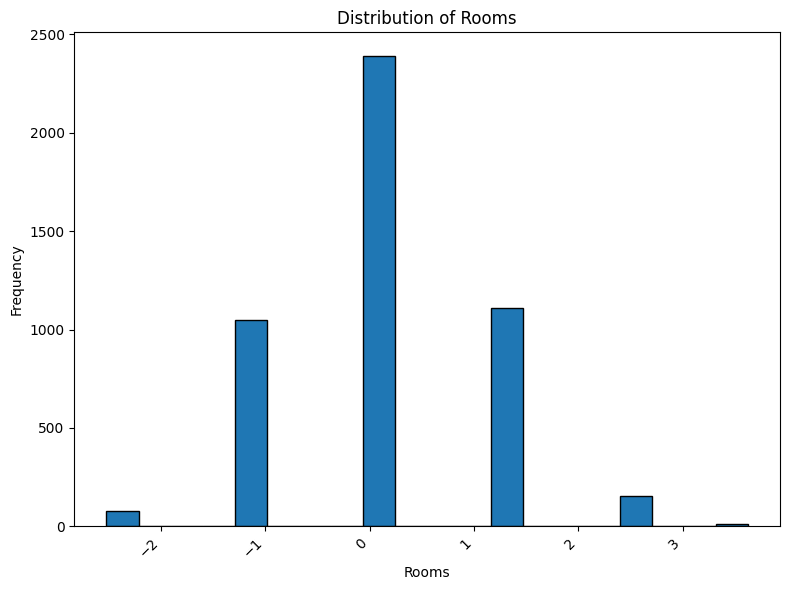

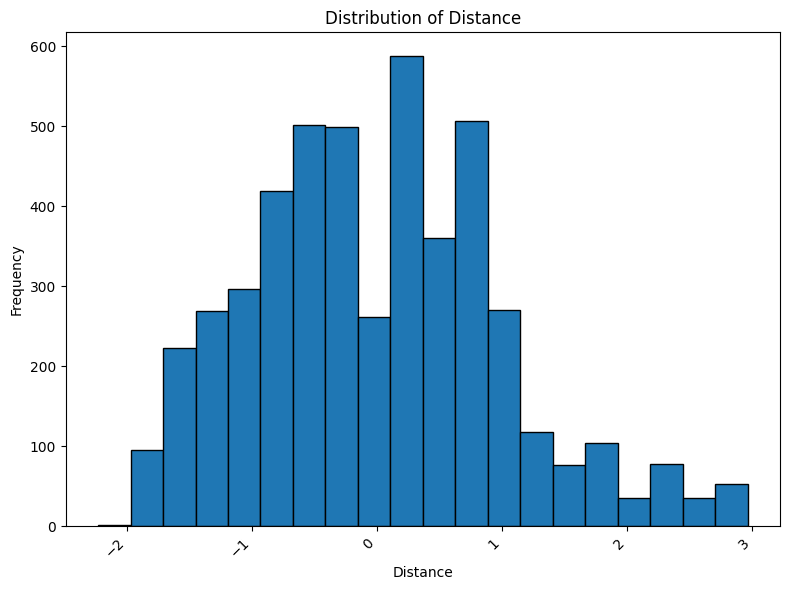

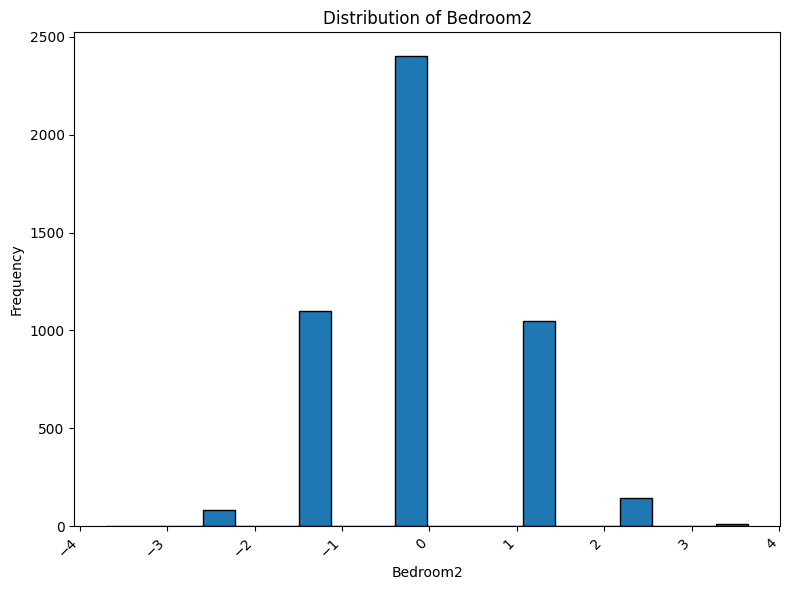

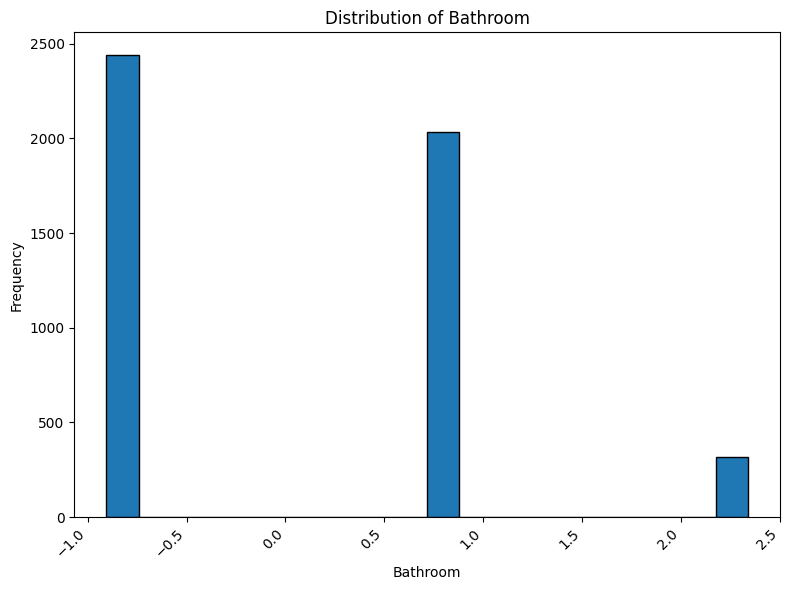

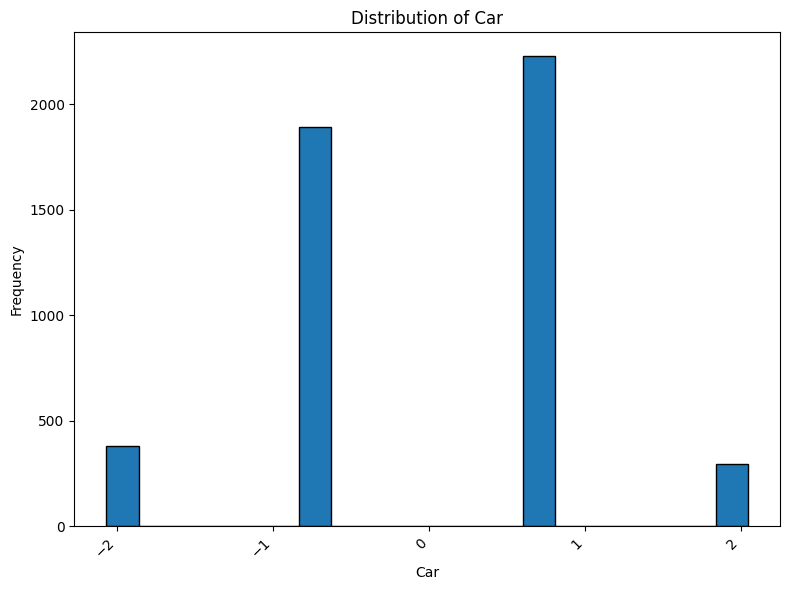

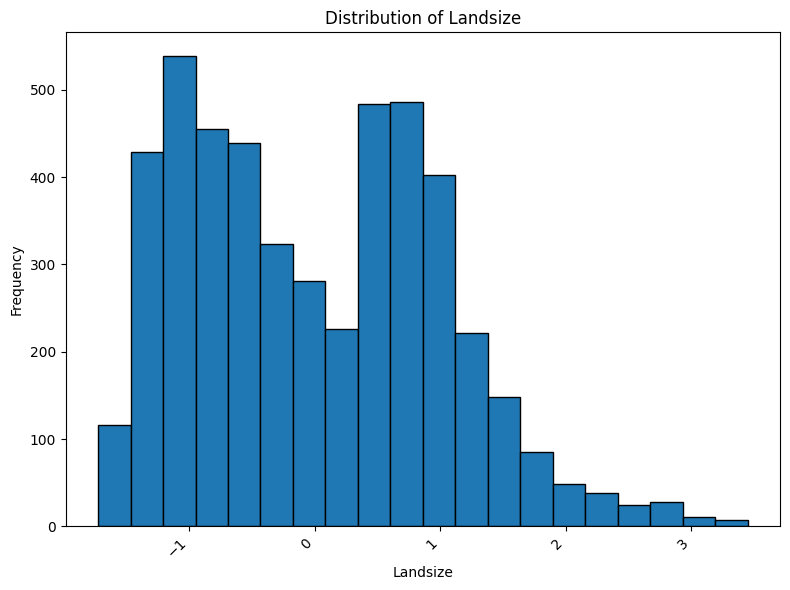

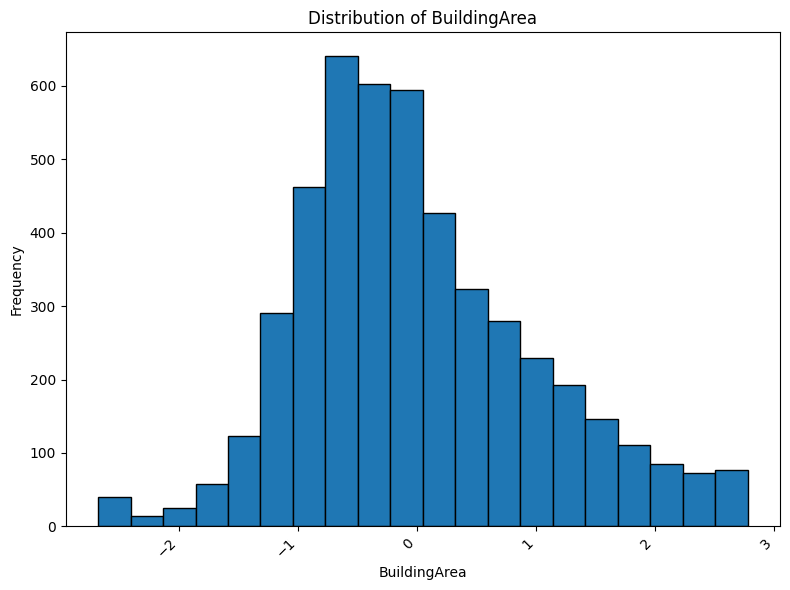

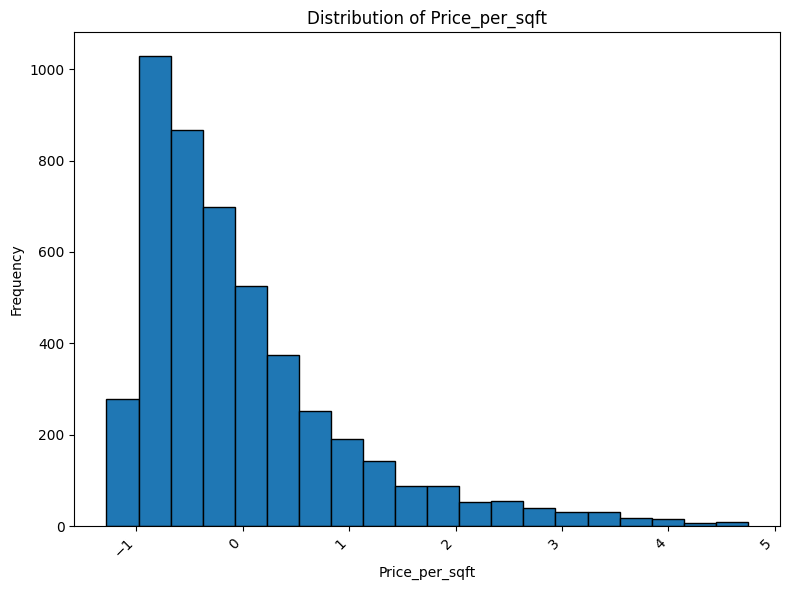

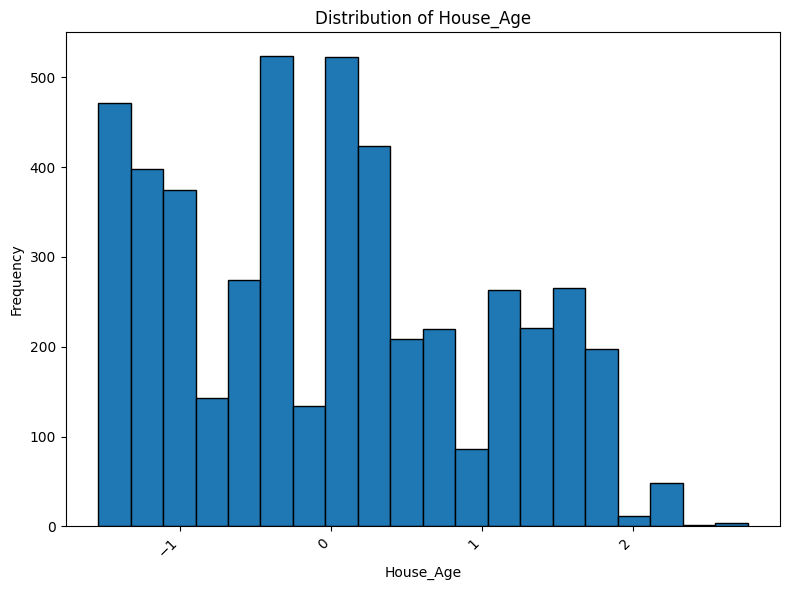

In [144]:
draw_all_distributions(df1[outlier_columns])

In [145]:
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[(z_scores < threshold)]
    return df

In [146]:
df_z = remove_outliers_zscore(df1, outlier_columns)

In [147]:
df_z.shape

(4657, 354)

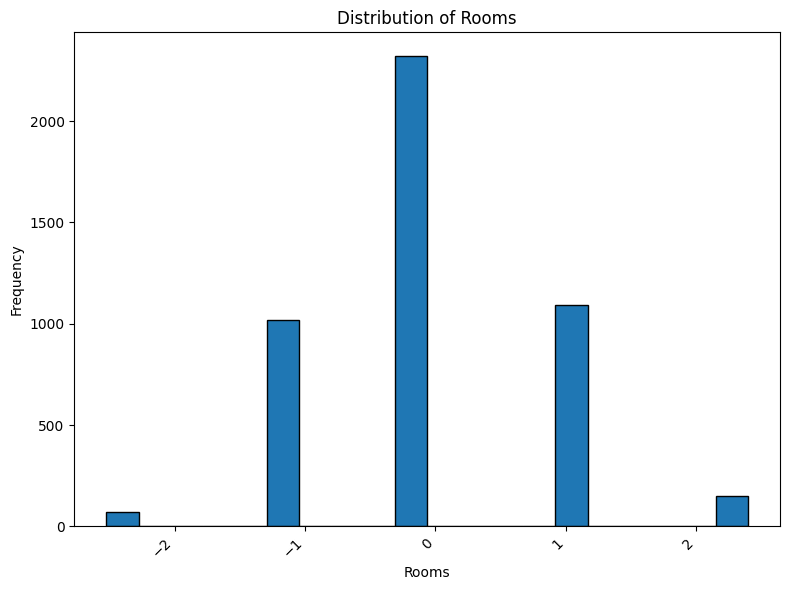

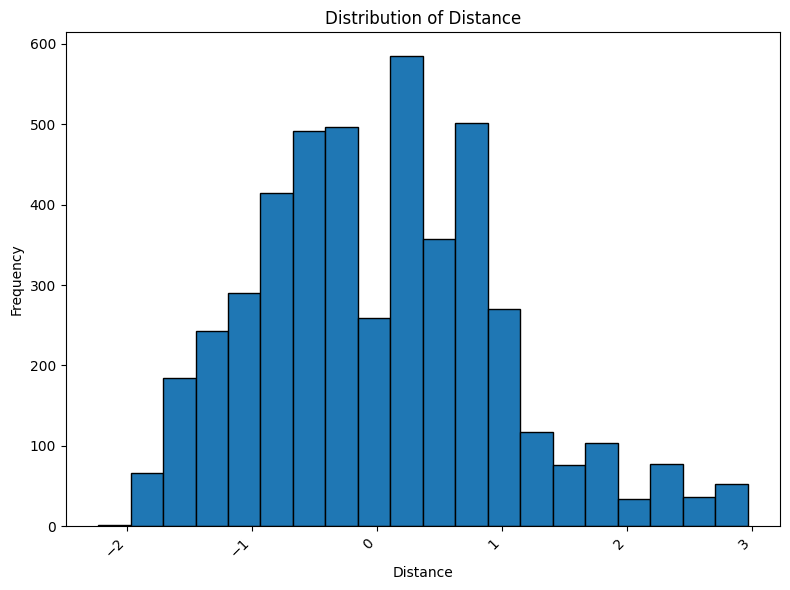

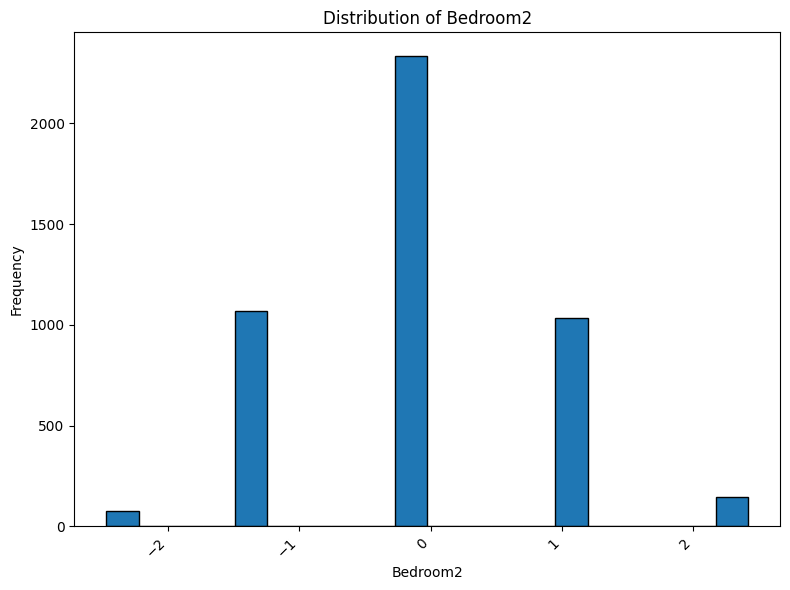

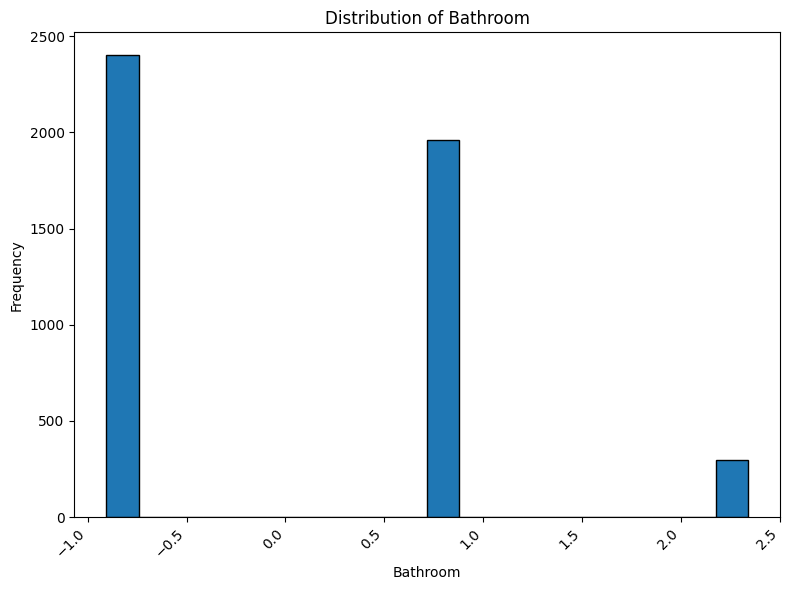

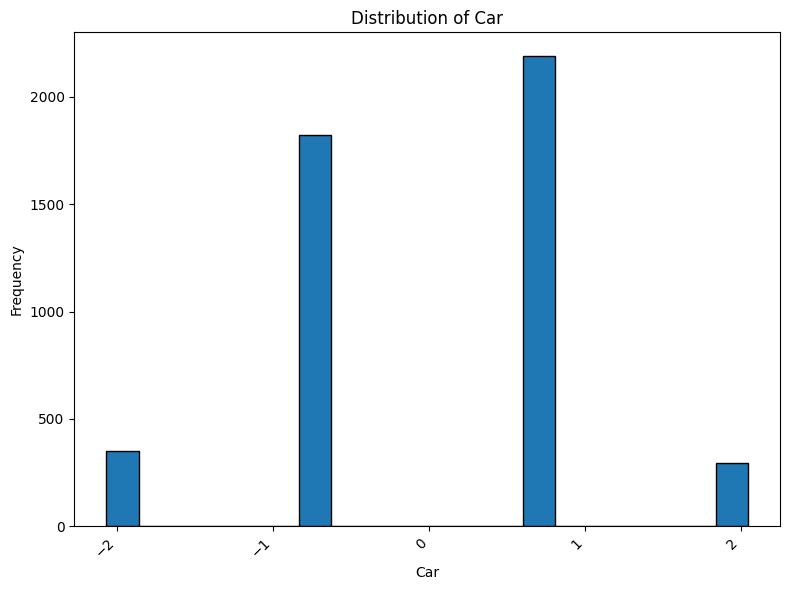

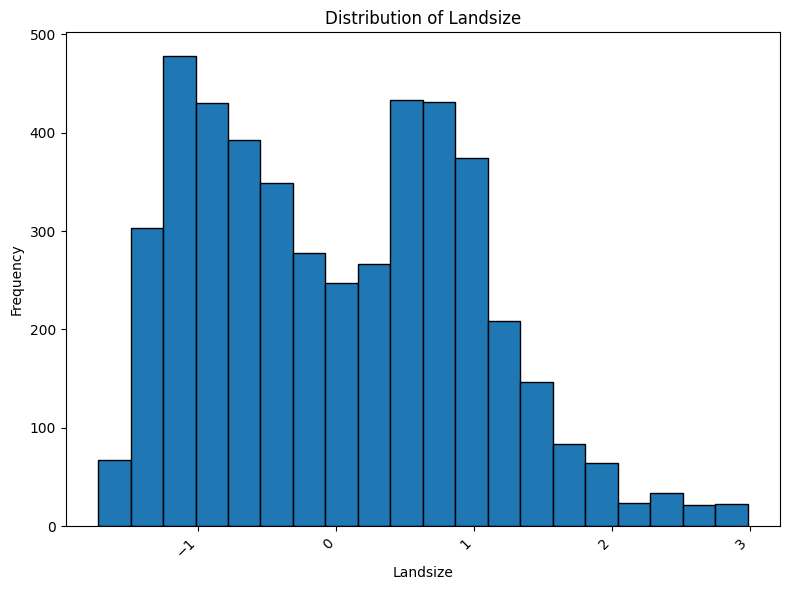

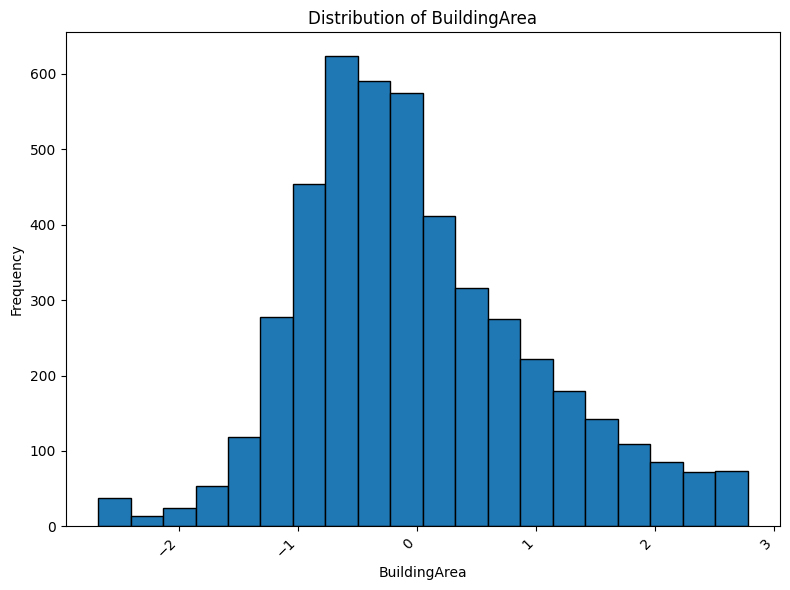

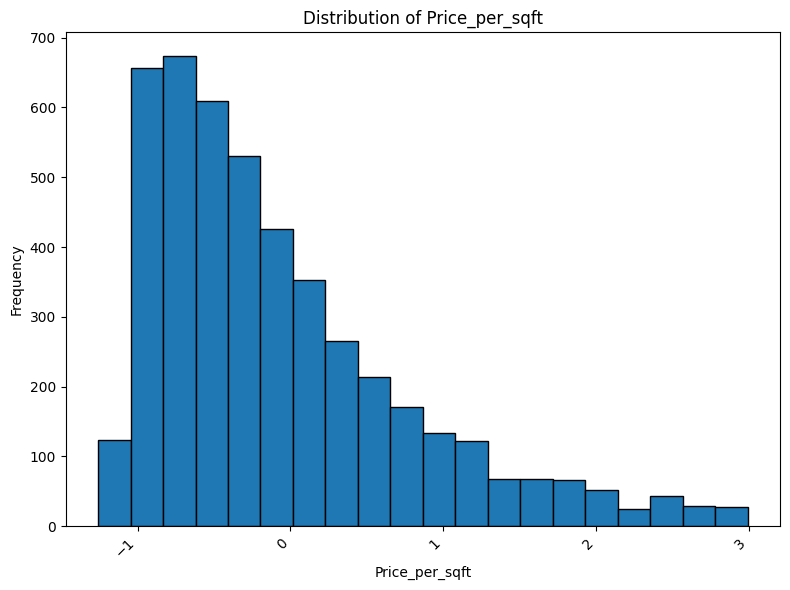

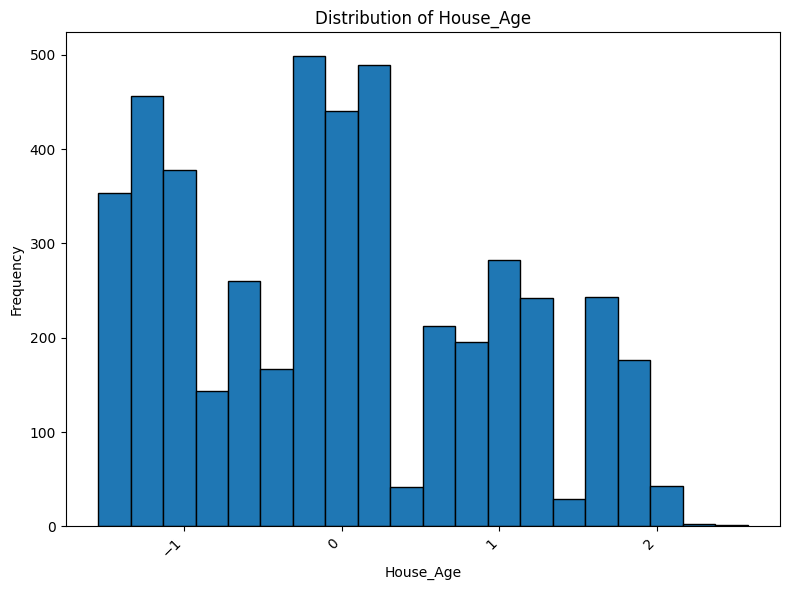

In [148]:
draw_all_distributions(df_z[outlier_columns])

In [151]:
df_z.shape

(4657, 354)

In [149]:
cleaned_df.shape

(4792, 358)

In [152]:
4657-4792

-135

In [153]:
cleaned_df = df_z

In [154]:
cleaned_df.to_csv('cleaned_for_unsupervised).csv', index=False)

**Data Standartization **

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler1 = scaler.fit_transform(cleaned_df)
df1 = pd.DataFrame(scaler1, columns=cleaned_df.columns)
df1

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,-1.309067,-1.733222,-0.368831,-1.276247,-0.895051,-2.097997,-1.246961,-1.150064,-0.102970,0.041335,...,4.972854,0.0,-0.361786,0.0,1.496170,-0.025389,-0.143529,-0.651609,-0.587517,0.0
1,-0.061609,-1.733222,-0.368831,1.221539,0.735721,-2.097997,-0.867444,1.386630,-0.028519,0.100331,...,4.972854,0.0,-0.361786,0.0,1.496170,-0.025389,-0.143529,-0.651609,-0.587517,0.0
2,-1.309067,-1.733222,-0.368831,-1.276247,-0.895051,0.660437,-0.820537,-0.607870,-0.077251,0.061334,...,4.972854,0.0,-0.361786,0.0,1.496170,-0.025389,-0.143529,-0.651609,-0.587517,0.0
3,-1.309067,-1.733222,-0.368831,-0.027354,-0.895051,0.660437,-0.974050,-1.227520,-0.009567,0.096331,...,4.972854,0.0,-0.361786,0.0,1.496170,-0.025389,-0.143529,-0.651609,-0.587517,0.0
4,-0.061609,-1.733222,-0.368831,-0.027354,0.735721,0.660437,-0.999635,0.999349,-0.111092,0.071333,...,4.972854,0.0,-0.361786,0.0,1.496170,-0.025389,-0.143529,-0.651609,-0.587517,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,1.185848,1.031154,0.933368,1.221539,0.735721,0.660437,1.145278,1.018713,-0.928300,2.318792,...,-0.201092,0.0,2.764068,0.0,-0.668373,-0.025389,-0.143529,-0.651609,-0.587517,0.0
4653,-1.309067,0.985836,-0.062431,-1.276247,-0.895051,-0.718780,-1.016692,-1.150064,1.268699,0.895081,...,-0.201092,0.0,-0.361786,0.0,1.496170,-0.025389,-0.143529,-0.651609,-0.587517,0.0
4654,1.185848,1.031154,-0.935671,1.221539,0.735721,-0.718780,0.910744,0.650795,-1.258594,-3.413548,...,-0.201092,0.0,-0.361786,0.0,-0.668373,-0.025389,-0.143529,-0.651609,1.702078,0.0
4655,-0.061609,-0.758893,-1.150151,-0.027354,0.735721,0.660437,-0.492191,-0.104404,-0.798348,-1.102193,...,-0.201092,0.0,-0.361786,0.0,-0.668373,-0.025389,-0.143529,-0.651609,1.702078,0.0


In [156]:
#from sklearn.preprocessing import MinMaxScaler
#minmax = MinMaxScaler()
#data_tf = minmax.fit_transform(df_selected2)
#data_tf
#df_minMax2 = pd.DataFrame(data_tf,columns=feature2)

#df_minMax2.head()

**K-means Clustering **

In [157]:
from sklearn.cluster import KMeans
wcss = []
for k in range(2, 10):  # Test from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

In [158]:
wcss

[1321295.9361979275,
 1303273.6908250425,
 1294499.0019169662,
 1284023.0936506118,
 1278091.3012872592,
 1271485.2827702411,
 1266801.2950272646,
 1253389.3610858656]

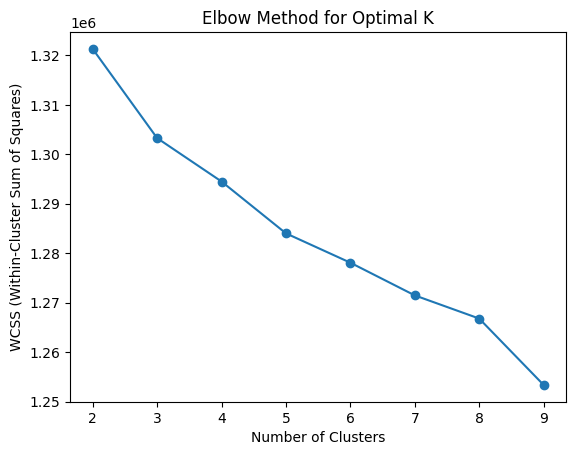

In [159]:
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [160]:
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_df['cluster'] = kmeans.fit_predict(df1)

In [161]:
cleaned_df.head(1)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,cluster
0,-1.292191,-1.673756,-0.384852,-1.248635,-0.90512,-2.07035,-1.200343,-1.148305,-0.096041,0.043166,...,0.0,-0.357855,0.0,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0


In [162]:
cleaned_df['cluster'].unique()

array([0, 2, 1], dtype=int32)

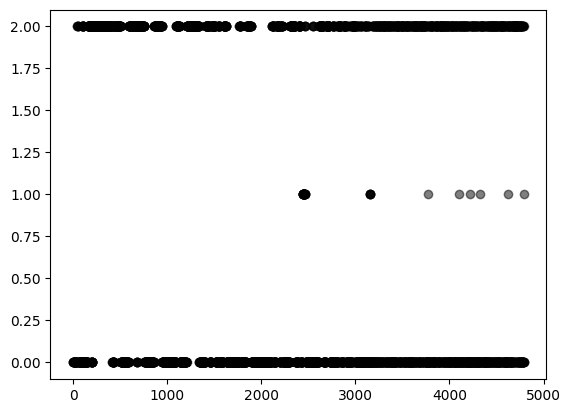

In [163]:
plt.plot(cleaned_df['cluster'], 'o', color='black', alpha=0.5)
plt.show()

Visualize the Clusters Using PCA

In [164]:
# Reduce dimensions to 2 using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(df1)

In [165]:
# Create a DataFrame with PCA results and cluster assignments
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2', 'PCA3'])

In [166]:
pca_df = pca_df.reset_index(drop=True)  # drop=True discards the old index
cleaned_df = cleaned_df.reset_index(drop=True)

In [167]:
pca_df['Cluster'] = cleaned_df['cluster']

In [168]:
pca_df['Cluster'].unique()

array([0, 2, 1], dtype=int32)

In [169]:
pca_df.isnull().any().sum()

0

In [170]:
pca_df.shape

(4657, 4)

In [171]:
pca_df.head(1)

,PCA1,PCA2,PCA3,Cluster
0,-3.391669,3.881263,-0.747649,0


In [172]:
# Reduce dimensions to 2 using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components1 = pca.fit_transform(df1)

In [173]:
# Create a DataFrame with PCA results and cluster assignments
pca_df2 = pd.DataFrame(pca_components1, columns=['PCA1', 'PCA2'])

In [174]:
pca_df2['Cluster'] = cleaned_df['cluster']

In [175]:
pca_df2.head()

,PCA1,PCA2,Cluster
0,-3.391669,3.881263,0
1,-1.811794,2.235478,0
2,-2.794842,3.171022,0
3,-2.663513,2.775093,0
4,-1.584628,1.661785,0


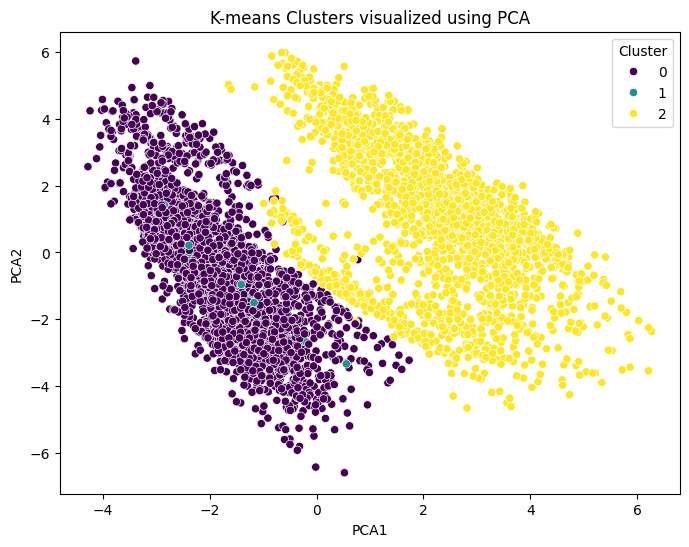

In [176]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df2, palette='viridis')
plt.title('K-means Clusters visualized using PCA')
plt.show()

In [177]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3',
                     color='Cluster',  # Color points by cluster
                     title='K-means Clusters PCA-3D Visualization')
fig.show()

In [178]:
pca_df.groupby("Cluster")['Cluster'].count()

,Cluster
Cluster,
0,2589
1,37
2,2031


In [179]:
pca_df.groupby("Cluster").agg(np.mean)

<ipython-input-179-13790f5c243d>:1: FutureWarning:

The provided callable <function mean at 0x7aebc2d89b20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



,PCA1,PCA2,PCA3
Cluster,,,
0,-1.774412,-0.643192,-0.004730
1,-1.158613,-1.392845,3.321637
2,2.283024,0.845278,-0.054483


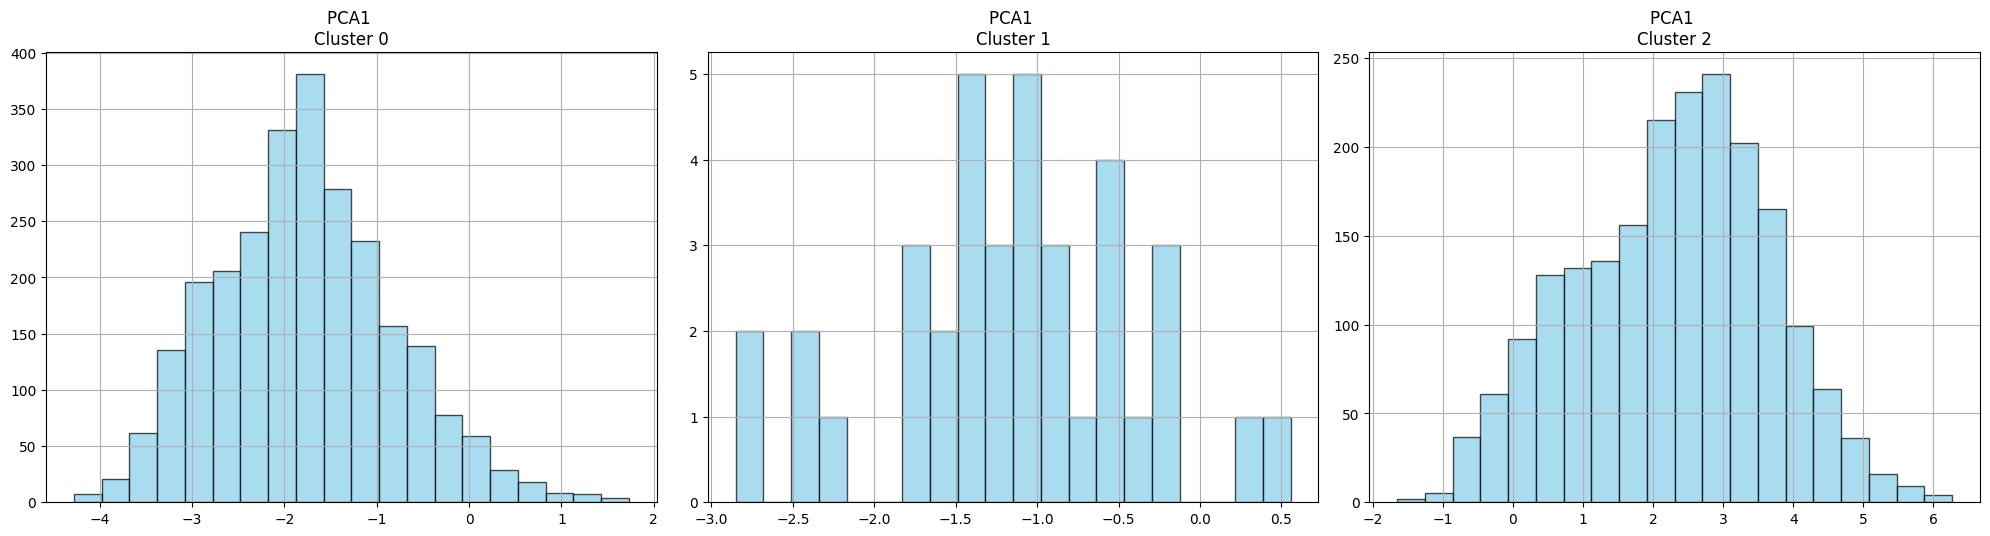

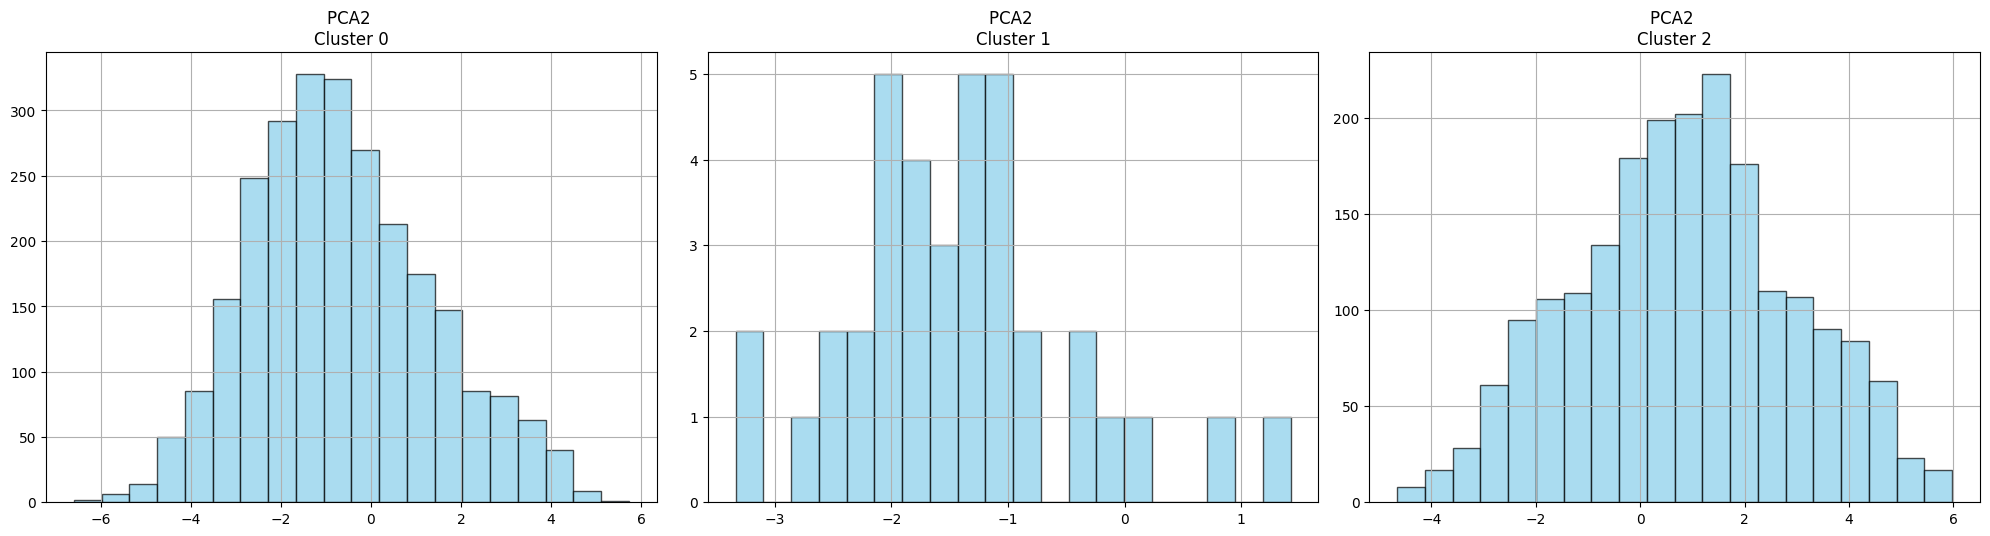

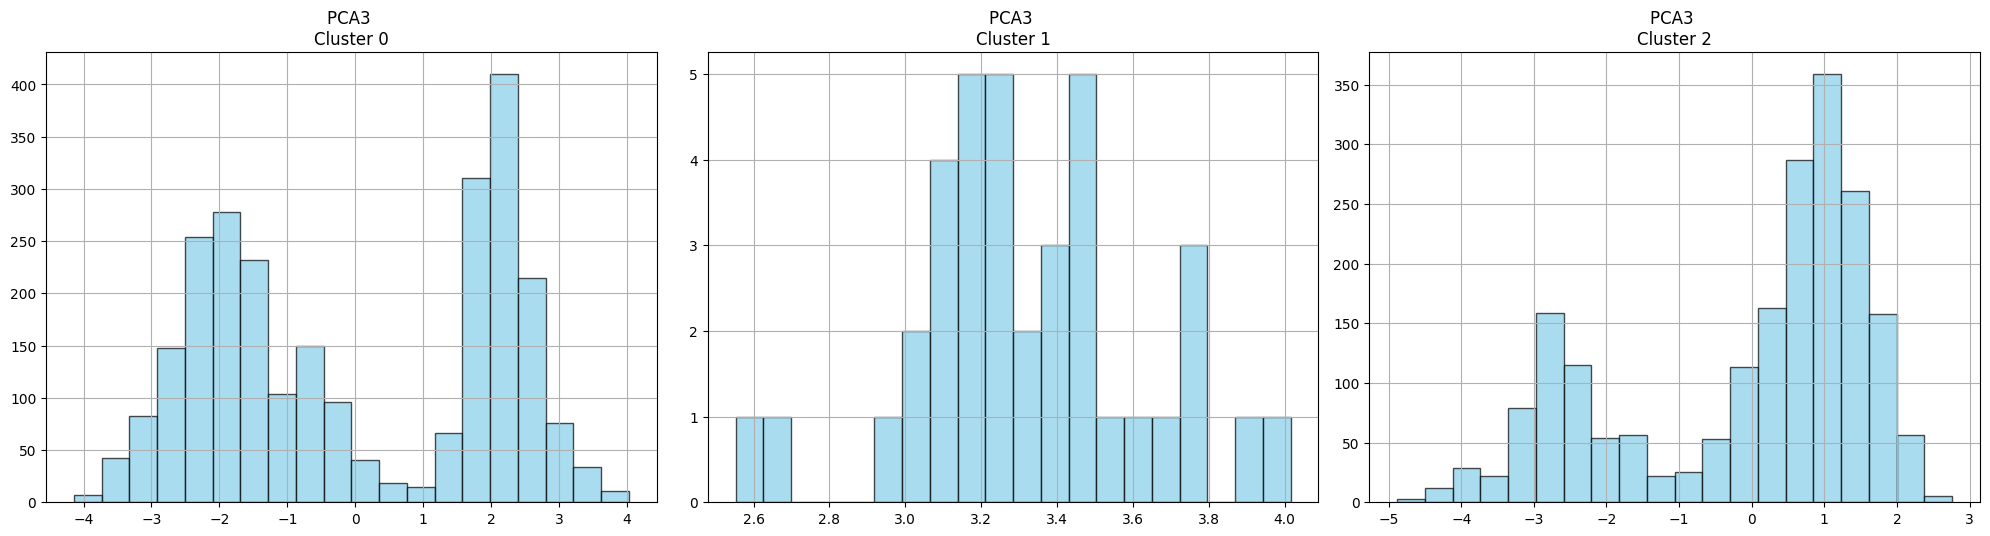

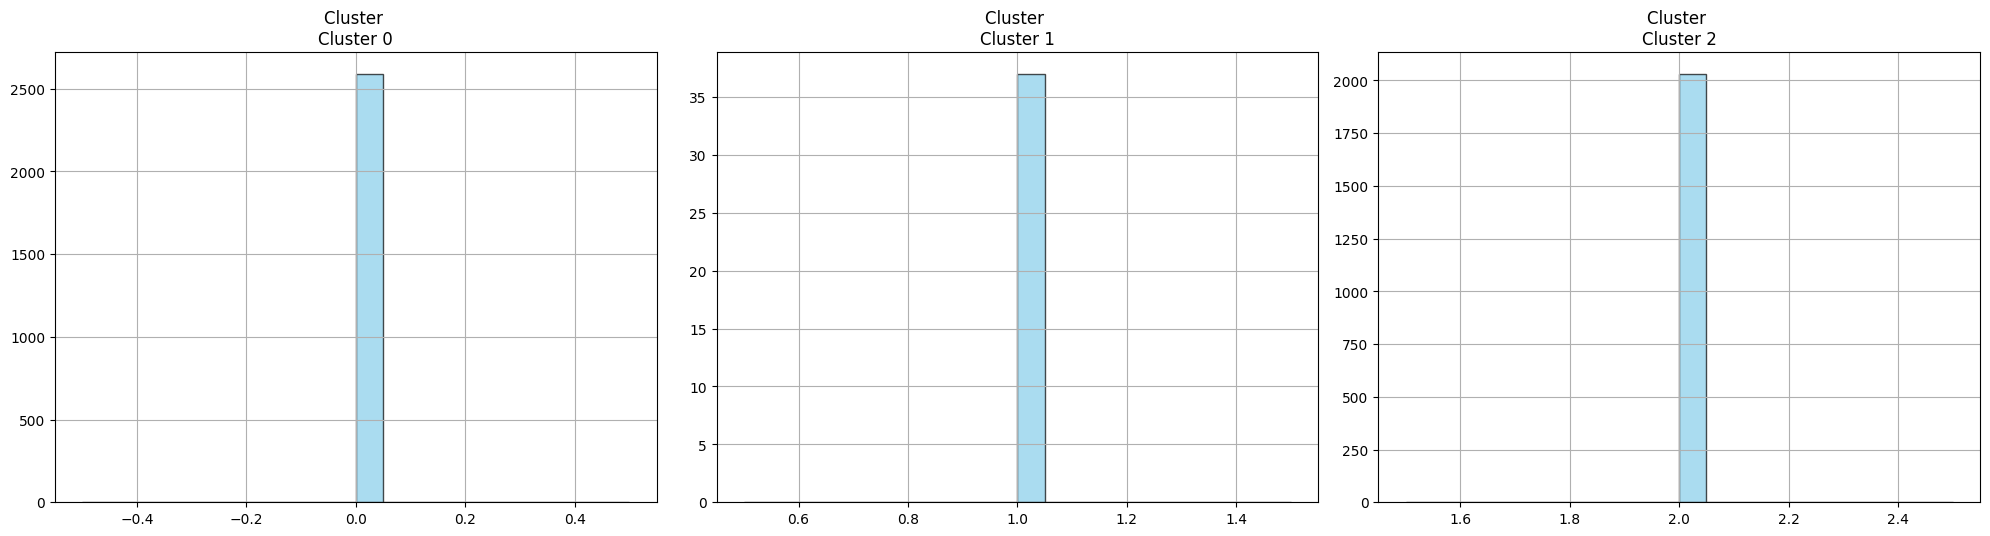

In [180]:
# Plot the histogram of various clusters with 3x3 grid layout
for i in pca_df.columns:
    if i == 'cluster_no':  # Skip the 'cluster_no' column if it's categorical
        continue

    plt.figure(figsize=(20, 15))  # Adjust the figure size for 3x3 layout
    clusters = sorted(pca_df['Cluster'].unique())  # Get unique cluster numbers
    num_clusters = len(clusters)  # Number of clusters

    for j, cluster_no in enumerate(clusters):
        plt.subplot(3, 3, j + 1)  # Create a 3x3 grid
        cluster = pca_df[pca_df['Cluster'] == cluster_no]
        cluster[i].hist(bins=20, color='skyblue', alpha=0.7, edgecolor='black')
        plt.title(f'{i} \nCluster {cluster_no}', fontsize=12)
        plt.tight_layout()  # Adjust layout to prevent overlap

    plt.show()


In [181]:
#intrepretation:
#- there are 3 clusters colored as 2-yellow, 0-deep blue, and 1-deep red
#- the cluster 1 is the smallest, cluster 2 and 0 are larger
#-


In [182]:
# testing the PCA model

In [183]:
# Calculate the silhouette score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df1, cleaned_df['cluster'])
print(f'Silhouette Score for PCA: {sil_score}')

Silhouette Score for PCA: -0.06140809519398339


In [184]:
# Group by cluster and compute descriptive statistics
cluster_profile = cleaned_df.groupby('cluster').mean()
print(cluster_profile)


            Rooms  Distance  Postcode  Bedroom2  Bathroom       Car  Landsize  \
cluster                                                                         
0       -0.102977 -0.157690 -0.684718 -0.097803 -0.166186 -0.084649 -0.149284   
1        0.435871 -0.490253 -1.162182  0.403542  0.542106  0.006229 -0.336660   
2        0.119014  0.284680  0.852959  0.119052  0.168655  0.146103  0.232994   

         BuildingArea  Lattitude  Longtitude  ...  CouncilArea_Yarra  \
cluster                                       ...                      
0           -0.162317   0.570365   -0.626884  ...           0.123548   
1            0.731741  -0.822628   -0.969739  ...          -0.215677   
2            0.195245  -0.694205    0.820017  ...          -0.215677   

         CouncilArea_Yarra Ranges  Regionname_Eastern Metropolitan  \
cluster                                                              
0                             0.0                        -0.357855   
1                      

In [185]:
cleaned_df.head(1)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,cluster
0,-1.292191,-1.673756,-0.384852,-1.248635,-0.90512,-2.07035,-1.200343,-1.148305,-0.096041,0.043166,...,0.0,-0.357855,0.0,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0


In [186]:
pca_df['PCA3'].min()

-4.881795695548984

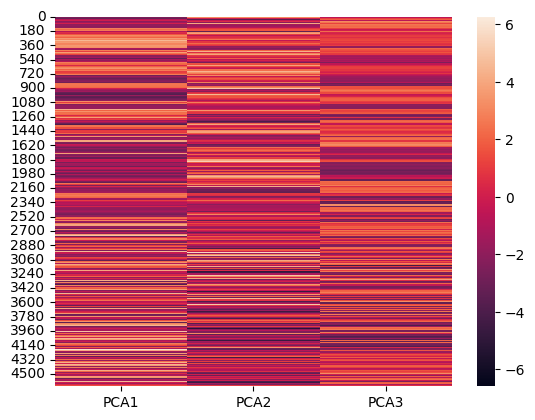

In [187]:
#PCA heatmap
#component_df=pd.DataFrame(cleaned_df,index=['PCA1',"PCA2", "PCA3"],columns=df.columns)
# Heat map
sns.heatmap(pca_df[["PCA1", "PCA2", "PCA3"]])
plt.show()

**T-SNE Clustering**

In [188]:
from sklearn.manifold import TSNE
# Apply t-SNE to reduce the dimensions of the data in 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df1)

In [189]:
tsne_components

array([[-15.868391,  67.7432  ],
       [-15.390013,  67.528015],
       [-15.816608,  68.03342 ],
       ...,
       [-11.111607, -31.168344],
       [-20.839472, -72.09076 ],
       [-11.999041, -22.642105]], dtype=float32)

In [190]:
#save as a dataframe
tsne_df = pd.DataFrame(tsne_components, columns=['tSNE1', 'tSNE2'])
tsne_df['Cluster'] = cleaned_df['cluster']  # Use the cluster labels from KMeans

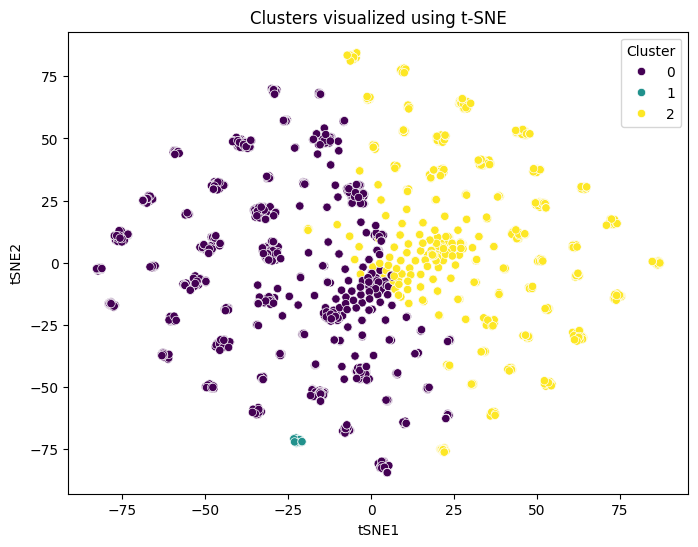

In [191]:
# Plot the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='Cluster', data=tsne_df, palette='viridis')
plt.title('Clusters visualized using t-SNE')
plt.show()

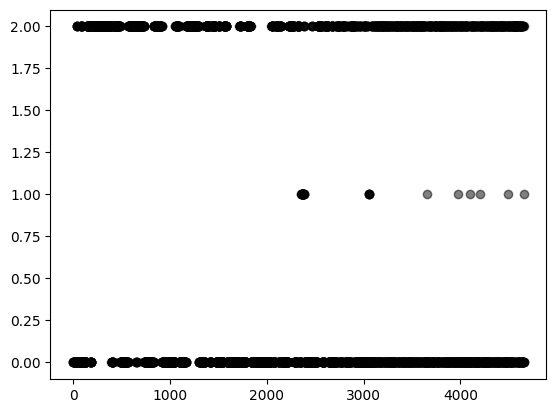

In [192]:
plt.plot(tsne_df['Cluster'], 'o', color='black', alpha=0.5)
plt.show()

In [193]:
#t-SNE #3D

In [194]:
from sklearn.manifold import TSNE
# Apply t-SNE to reduce the dimensions of the data in 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_components = tsne.fit_transform(df1)

In [195]:
# Create a DataFrame for visualization
tsne_df3d = pd.DataFrame(tsne_components, columns=['tSNE1', 'tSNE2', 'tSNE3'])
tsne_df3d['Cluster'] = cleaned_df['cluster']  # Use the cluster labels from KMeans

In [196]:
#save it to our cleaned dataset
cleaned_df['tsne_cluster'] = tsne_df3d['Cluster']
cleaned_df.head(1)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,cluster,tsne_cluster
0,-1.292191,-1.673756,-0.384852,-1.248635,-0.90512,-2.07035,-1.200343,-1.148305,-0.096041,0.043166,...,-0.357855,0.0,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0,0


In [197]:
import plotly.express as px
fig = px.scatter_3d(tsne_df3d, x='tSNE1', y='tSNE2', z='tSNE3',
                     color='Cluster',  # Color points by cluster
                     title='3D t-SNE Visualization')
fig.show()

**DBSCAN**

In [198]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [199]:
# Perform DBSCAN clustering on PCA 2D
db = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
cleaned_df['cluster_dbscan'] = db.fit_predict(pca_df[['PCA1','PCA2']])
print(cleaned_df['cluster_dbscan'].unique())

[ 0 -1  1]


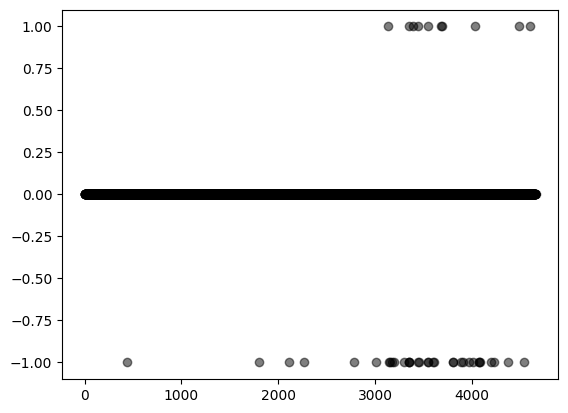

In [200]:
plt.plot(cleaned_df['cluster_dbscan'], 'o', color='black', alpha=0.5)
plt.show()

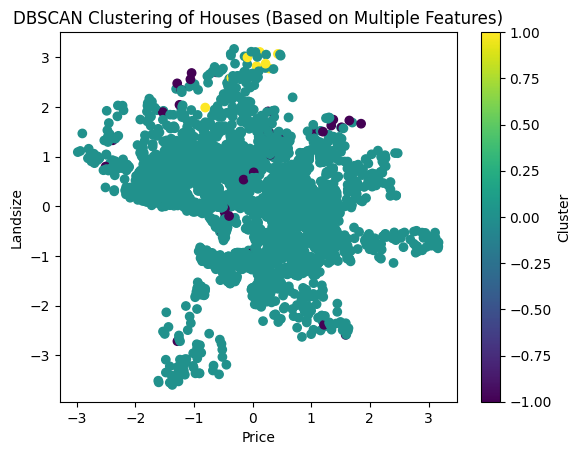

In [201]:
# Visualize the clusters based on latitude and longitude
plt.scatter(cleaned_df['Lattitude'], cleaned_df['Longtitude'], c=cleaned_df['cluster_dbscan'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Landsize')
plt.title('DBSCAN Clustering of Houses (Based on Multiple Features)')
plt.colorbar(label='Cluster')
plt.show()

In [202]:
from sklearn.metrics import silhouette_score as shs

In [203]:
s= shs(df1, cleaned_df['cluster_dbscan'])

In [204]:
print("silhoutte_score DBSCAN: " ,s)

silhoutte_score DBSCAN:  0.3465435268336237


In [205]:
eps = np.linspace(0.01, 1 , num=20)
eps

array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])

In [206]:
minSample = np.arange(2, 25, step =2)
minSample

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

In [207]:
import itertools

In [208]:
combinations = list(itertools.product(eps, minSample))
N = len(combinations)
N

240

In [209]:
def GrideSearch(combinations, X):
  scores =[]
  all_labels = []
  for i, (eps, min_samples) in enumerate(combinations):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    if (num_clusters <2) or (num_clusters > 25):
      scores.append(-20)
      all_labels.append("poor")
      print("at iteration:", i, "eps:", eps, "min_sample:", min_samples,"number_cluser:", num_clusters, "moving ..")
      continue
    scores.append(shs(X, labels))
    all_labels.append(labels)
    print("at iteration:", i, "Score:", scores[-1], "number_cluser:", num_clusters)
  best_index = np.argmax(scores)
  best_parameter = combinations[best_index]
  best_label = all_labels[best_index]
  best_score = scores[best_index]
  return ("best_epsilon:", best_parameter[0],"best_min:", best_parameter[1],"best_labels:", best_label, "best_score", best_score)

In [210]:
best_parameter = GrideSearch(combinations, df1)

at iteration: 0 Score: -0.28790192215545796 number_cluser: 11
at iteration: 1 eps: 0.01 min_sample: 4 number_cluser: 0 moving ..
at iteration: 2 eps: 0.01 min_sample: 6 number_cluser: 0 moving ..
at iteration: 3 eps: 0.01 min_sample: 8 number_cluser: 0 moving ..
at iteration: 4 eps: 0.01 min_sample: 10 number_cluser: 0 moving ..
at iteration: 5 eps: 0.01 min_sample: 12 number_cluser: 0 moving ..
at iteration: 6 eps: 0.01 min_sample: 14 number_cluser: 0 moving ..
at iteration: 7 eps: 0.01 min_sample: 16 number_cluser: 0 moving ..
at iteration: 8 eps: 0.01 min_sample: 18 number_cluser: 0 moving ..
at iteration: 9 eps: 0.01 min_sample: 20 number_cluser: 0 moving ..
at iteration: 10 eps: 0.01 min_sample: 22 number_cluser: 0 moving ..
at iteration: 11 eps: 0.01 min_sample: 24 number_cluser: 0 moving ..
at iteration: 12 Score: -0.31799913403062935 number_cluser: 21
at iteration: 13 eps: 0.06210526315789474 min_sample: 4 number_cluser: 0 moving ..
at iteration: 14 eps: 0.06210526315789474 min

In [211]:
print(best_parameter)

('best_epsilon:', 0.8436842105263158, 'best_min:', 12, 'best_labels:', array([-1, -1, -1, ..., -1, -1, -1]), 'best_score', -0.23257317090032278)


In [227]:
# Perform DBSCAN clustering for cleaned dataset of our features
db = DBSCAN(eps=0.8436842105263158, min_samples=12, metric='euclidean')
cleaned_df['cluster_dbscan'] = db.fit_predict(df1)
print(cleaned_df['cluster_dbscan'].unique())

[-1  0  1]


In [228]:
cleaned_df['cluster_dbscan'].value_counts()

,count
cluster_dbscan,
-1,4619
1,22
0,16


In [229]:
cleaned_df.head(1)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,cluster,tsne_cluster,cluster_dbscan
0,-1.292191,-1.673756,-0.384852,-1.248635,-0.90512,-2.07035,-1.200343,-1.148305,-0.096041,0.043166,...,0.0,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0,0,-1


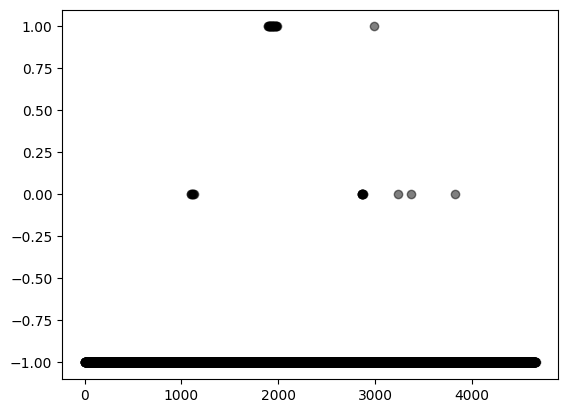

In [230]:
plt.plot(cleaned_df['cluster_dbscan'], 'o', color='black', alpha=0.5)
plt.show()

In [231]:
import plotly.express as px
fig = px.scatter_3d(cleaned_df, x='Lattitude', y='Longtitude', z='cluster_dbscan',
                     color='cluster_dbscan',  # Color points by cluster
                     title='long Lan - cluster dbscan')
fig.show()

In [232]:
# the 3D graph shows:
# there are 3 distinct group of the houses in the context latitude and longtitude
#1: the most valued house
#2: the less valued house
#0: medium valued house

In [233]:
df1.corr()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
Rooms,1.000000,0.223613,0.062527,0.948401,0.545061,0.353611,0.356184,0.682628,-0.034199,0.077765,...,-0.113562,NaN,0.091585,NaN,-0.140326,-0.001564,0.057823,0.028959,0.032494,NaN
Distance,0.223613,1.000000,0.223307,0.231320,0.138927,0.282260,0.313895,0.145432,-0.002861,0.246862,...,-0.336126,NaN,0.293073,NaN,-0.176866,0.067025,0.284281,-0.065879,-0.054020,NaN
Postcode,0.062527,0.223307,1.000000,0.063271,0.128629,0.069725,0.090797,0.113454,-0.527659,0.626792,...,0.002594,NaN,0.103421,NaN,-0.219886,-0.000807,0.186363,0.655645,-0.589755,NaN
Bedroom2,0.948401,0.231320,0.063271,1.000000,0.535740,0.356868,0.349704,0.663197,-0.028206,0.077312,...,-0.116503,NaN,0.094888,NaN,-0.134959,-0.000694,0.060910,0.023804,0.028752,NaN
Bathroom,0.545061,0.138927,0.128629,0.535740,1.000000,0.296030,0.125292,0.609633,-0.107236,0.101829,...,-0.058597,NaN,0.056010,NaN,-0.176038,0.004878,0.028406,0.122642,0.007314,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Regionname_Northern Victoria,-0.001564,0.067025,-0.000807,-0.000694,0.004878,0.005096,0.033697,0.002593,0.043452,0.042458,...,-0.005106,NaN,-0.009185,NaN,-0.016969,1.000000,-0.003644,-0.016544,-0.014917,NaN
Regionname_South-Eastern Metropolitan,0.057823,0.284281,0.186363,0.060910,0.028406,0.065309,0.050703,0.038033,-0.300067,0.184304,...,-0.028862,NaN,-0.051927,NaN,-0.095931,-0.003644,1.000000,-0.093525,-0.084326,NaN
Regionname_Southern Metropolitan,0.028959,-0.065879,0.655645,0.023804,0.122642,0.034085,0.069224,0.125227,-0.633717,0.365639,...,-0.131033,NaN,-0.235743,NaN,-0.435518,-0.016544,-0.093525,1.000000,-0.382832,NaN
Regionname_Western Metropolitan,0.032494,-0.054020,-0.589755,0.028752,0.007314,0.000830,-0.064256,0.013411,0.107699,-0.741870,...,-0.118145,NaN,-0.212555,NaN,-0.392681,-0.014917,-0.084326,-0.382832,1.000000,NaN


In [234]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3)
reduced_data = svd.fit_transform(df1)

In [235]:
#cumulative_variance = np.cumsum(svd.explained_variance_ratio_)
# Find the number of components for 95% variance
#n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
#n_components_95

In [236]:
reduced_data_cl3 = reduced_data[:, :3]
svd_df3cl= pd.DataFrame(reduced_data_cl3, columns=['SVD1', 'SVD2', 'SVD3'])
svd_df3cl

,SVD1,SVD2,SVD3
0,-3.383747,3.878444,-0.757952
1,-1.798686,2.228452,-0.083243
2,-2.786924,3.168288,-0.734458
3,-2.655558,2.772256,-0.824770
4,-1.573169,1.655282,-0.436026
...,...,...,...
4652,3.743217,-2.192600,-1.605603
4653,-1.594471,0.275608,-2.312060
4654,-0.611398,-3.528567,3.264523
4655,-1.173747,-1.499211,2.621884


In [237]:
svd_df3cl['cluster_dbscan'] = cleaned_df['cluster_dbscan']

In [238]:
svd_df3cl.head(1)

,SVD1,SVD2,SVD3,cluster_dbscan
0,-3.383747,3.878444,-0.757952,-1


In [239]:
# Perform DBSCAN clustering
db = DBSCAN(eps=0.5310526315789474, min_samples=6, metric='euclidean')
svd_dbscan = db.fit_predict(reduced_data)
svd_dbscan

array([0, 0, 0, ..., 1, 1, 1])

In [240]:
best_parameter = GrideSearch(combinations, reduced_data)

at iteration: 0 Score: -0.6942179367328649 number_cluser: 15
at iteration: 1 eps: 0.01 min_sample: 4 number_cluser: 0 moving ..
at iteration: 2 eps: 0.01 min_sample: 6 number_cluser: 0 moving ..
at iteration: 3 eps: 0.01 min_sample: 8 number_cluser: 0 moving ..
at iteration: 4 eps: 0.01 min_sample: 10 number_cluser: 0 moving ..
at iteration: 5 eps: 0.01 min_sample: 12 number_cluser: 0 moving ..
at iteration: 6 eps: 0.01 min_sample: 14 number_cluser: 0 moving ..
at iteration: 7 eps: 0.01 min_sample: 16 number_cluser: 0 moving ..
at iteration: 8 eps: 0.01 min_sample: 18 number_cluser: 0 moving ..
at iteration: 9 eps: 0.01 min_sample: 20 number_cluser: 0 moving ..
at iteration: 10 eps: 0.01 min_sample: 22 number_cluser: 0 moving ..
at iteration: 11 eps: 0.01 min_sample: 24 number_cluser: 0 moving ..
at iteration: 12 eps: 0.06210526315789474 min_sample: 2 number_cluser: 260 moving ..
at iteration: 13 Score: -0.6220410480915524 number_cluser: 8
at iteration: 14 eps: 0.06210526315789474 min_

In [241]:
print(best_parameter)

('best_epsilon:', 0.8957894736842106, 'best_min:', 22, 'best_labels:', array([0, 0, 0, ..., 1, 1, 1]), 'best_score', 0.4160292419735927)


In [261]:
# Perform DBSCAN clustering
db = DBSCAN(eps=0.8957894736842106, min_samples=22, metric='euclidean')
svd_dbscan = db.fit_predict(reduced_data)
svd_dbscan

array([0, 0, 0, ..., 1, 1, 1])

In [262]:
svd_df3cl['svd_dbscan'] = svd_dbscan
svd_df3cl['svd_dbscan'].unique()

array([ 0,  1,  2, -1])

In [263]:
tsne_df3d['Cluster']

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
4652,2
4653,0
4654,0
4655,1


In [264]:
cleaned_df['cluster_svd_dbscan'] = svd_df3cl['svd_dbscan']
cleaned_df.head(1)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,cluster,tsne_cluster,cluster_dbscan,cluster_svd_dbscan
0,-1.292191,-1.673756,-0.384852,-1.248635,-0.90512,-2.07035,-1.200343,-1.148305,-0.096041,0.043166,...,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0,0,-1,0


In [265]:
import plotly.express as px
fig = px.scatter_3d(svd_df3cl, x='SVD1', y='SVD2', z='SVD3',
                     color='svd_dbscan',  # Color points by cluster
                     title='SVD-DBSCAN, svd_dbscan Visualization')
fig.show()

**checking and comparing each models (model evaluation)**

In [267]:
def evaluate_clusters(data, labels, method):
    if len(set(labels)) > 1:
        sil = silhouette_score(data, labels)
        dbi = davies_bouldin_score(data, labels)
        chi = calinski_harabasz_score(data, labels)
    else:
        sil, dbi, chi = -1, -1, -1  # Invalid clustering
    print(f"{method} -> Silhouette: {sil:.3f}, DBI: {dbi:.3f}, CHI: {chi:.3f}")


In [268]:
evaluate_clusters(df1, cleaned_df['cluster'] , "K-Means")
evaluate_clusters(df1, cleaned_df['cluster_dbscan'] , "DBSCAN")
evaluate_clusters(reduced_data, svd_dbscan , "SVD-DBSCAN")
evaluate_clusters(tsne_components, tsne_df['Cluster'] , "t-SNE")
evaluate_clusters(pca_components, pca_df['Cluster'] , "PCA")

K-Means -> Silhouette: -0.061, DBI: 5.001, CHI: 51.116
DBSCAN -> Silhouette: -0.233, DBI: 1.820, CHI: 5.053
SVD-DBSCAN -> Silhouette: 0.416, DBI: 1.377, CHI: 2029.368
t-SNE -> Silhouette: 0.067, DBI: 1.460, CHI: 636.606
PCA -> Silhouette: 0.144, DBI: 1.251, CHI: 1179.396


In [269]:
# a silhouttee score close to 1 better
# a lower Davies-Bouldin Index (DBI) is better
# a higher Calinski-Harabasz Index (CHI) is better

#so based on this mesuarements the PCA and SVD are the best models to consider

In [270]:
#final result evaluation

In [272]:
cleaned_df.head(1)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,cluster,tsne_cluster,cluster_dbscan,cluster_svd_dbscan
0,-1.292191,-1.673756,-0.384852,-1.248635,-0.90512,-2.07035,-1.200343,-1.148305,-0.096041,0.043166,...,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0,0,-1,0


In [273]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Price_per_sqft', 'House_Age'],
      dtype='object')

In [274]:
cleaned_df.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,cluster,tsne_cluster,cluster_dbscan,cluster_svd_dbscan
0,-1.292191,-1.673756,-0.384852,-1.248635,-0.905120,-2.070350,-1.200343,-1.148305,-0.096041,0.043166,...,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0,0,-1,0
1,-0.062608,-1.673756,-0.384852,1.196587,0.717527,-2.070350,-0.830161,1.386108,-0.020962,0.102763,...,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0,0,-1,0
2,-1.292191,-1.673756,-0.384852,-1.248635,-0.905120,0.673701,-0.784408,-0.606598,-0.070105,0.063369,...,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0,0,-1,0
3,-1.292191,-1.673756,-0.384852,-0.026024,-0.905120,0.673701,-0.934145,-1.225691,-0.001851,0.098723,...,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0,0,-1,0
4,-0.062608,-1.673756,-0.384852,-0.026024,0.717527,0.673701,-0.959101,0.999175,-0.104232,0.073470,...,1.48866,-0.025029,-0.142217,-0.662274,-0.577672,0.0,0,0,-1,0


In [275]:
df1.iloc[:, :15].columns.to_list()

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'Lattitude',
 'Longtitude',
 'Price_per_sqft',
 'House_Age',
 'Suburb_Abbotsford',
 'Suburb_Aberfeldie',
 'Suburb_Airport West']

In [276]:
feature_df = cleaned_df.iloc[:, :13]

In [277]:
feature_df

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Price_per_sqft,House_Age,Suburb_Abbotsford
0,-1.292191,-1.673756,-0.384852,-1.248635,-0.905120,-2.070350,-1.200343,-1.148305,-0.096041,0.043166,1.309623,1.590163,12.598942
1,-0.062608,-1.673756,-0.384852,1.196587,0.717527,-2.070350,-0.830161,1.386108,-0.020962,0.102763,1.719258,1.324449,12.598942
2,-1.292191,-1.673756,-0.384852,-1.248635,-0.905120,0.673701,-0.784408,-0.606598,-0.070105,0.063369,1.211878,1.855878,12.598942
3,-1.292191,-1.673756,-0.384852,-0.026024,-0.905120,0.673701,-0.934145,-1.225691,-0.001851,0.098723,0.649316,1.590163,12.598942
4,-0.062608,-1.673756,-0.384852,-0.026024,0.717527,0.673701,-0.959101,0.999175,-0.104232,0.073470,1.178942,-1.199842,12.598942
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,1.166975,1.047759,0.910699,1.196587,0.717527,0.673701,1.133052,1.018522,-0.928325,2.343812,-0.605161,-0.535555,-0.079372
4653,-1.292191,1.003144,-0.080016,-1.248635,-0.905120,-0.698324,-0.975738,-1.148305,1.287185,0.905605,-0.108289,-1.226414,-0.079372
4654,1.166975,1.047759,-0.948797,1.196587,0.717527,-0.698324,0.904288,0.650935,-1.261402,-3.446893,-0.964002,-0.535555,-0.079372
4655,-0.062608,-0.714534,-1.162182,-0.026024,0.717527,0.673701,-0.464138,-0.103585,-0.797278,-1.112005,-0.107945,-0.934127,-0.079372


In [279]:
feature_df[['cluster_kmeans', 'cluster_tsne', 'cluster_dbscan', 'cluster_svd_dbscan']] = cleaned_df.iloc[:, 354:]

In [280]:
feature_df.isnull().any().sum().sum()

0

In [281]:
feature_df.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Price_per_sqft,House_Age,Suburb_Abbotsford,cluster_kmeans,cluster_tsne,cluster_dbscan,cluster_svd_dbscan
0,-1.292191,-1.673756,-0.384852,-1.248635,-0.905120,-2.070350,-1.200343,-1.148305,-0.096041,0.043166,1.309623,1.590163,12.598942,0,0,-1,0
1,-0.062608,-1.673756,-0.384852,1.196587,0.717527,-2.070350,-0.830161,1.386108,-0.020962,0.102763,1.719258,1.324449,12.598942,0,0,-1,0
2,-1.292191,-1.673756,-0.384852,-1.248635,-0.905120,0.673701,-0.784408,-0.606598,-0.070105,0.063369,1.211878,1.855878,12.598942,0,0,-1,0
3,-1.292191,-1.673756,-0.384852,-0.026024,-0.905120,0.673701,-0.934145,-1.225691,-0.001851,0.098723,0.649316,1.590163,12.598942,0,0,-1,0
4,-0.062608,-1.673756,-0.384852,-0.026024,0.717527,0.673701,-0.959101,0.999175,-0.104232,0.073470,1.178942,-1.199842,12.598942,0,0,-1,0


In [282]:
feature_df.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Price_per_sqft',
       'House_Age', 'Suburb_Abbotsford', 'cluster_kmeans', 'cluster_tsne',
       'cluster_dbscan', 'cluster_svd_dbscan'],
      dtype='object')

In [283]:
feature_col = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Price_per_sqft',
       'House_Age', 'cluster_kmeans', 'cluster_tsne', 'cluster_dbscan',
       'cluster_svd_dbscan']

In [284]:
feature_for_cluster = feature_df.groupby("cluster_kmeans")[feature_col].mean()
feature_for_cluster

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Price_per_sqft,House_Age,cluster_kmeans,cluster_tsne,cluster_dbscan,cluster_svd_dbscan
cluster_kmeans,,,,,,,,,,,,,,,,
0,-0.102977,-0.157690,-0.684718,-0.097803,-0.166186,-0.084649,-0.149284,-0.162317,0.570365,-0.626884,-0.151483,-0.021747,0.0,0.0,-0.976825,0.423329
1,0.435871,-0.490253,-1.162182,0.403542,0.542106,0.006229,-0.336660,0.731741,-0.822628,-0.969739,0.534911,0.071280,1.0,1.0,-1.000000,1.000000
2,0.119014,0.284680,0.852959,0.119052,0.168655,0.146103,0.232994,0.195245,-0.694205,0.820017,0.006331,-0.002830,2.0,2.0,-1.000000,1.386017


In [285]:
feature_for_cluster.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Price_per_sqft,House_Age,cluster_kmeans,cluster_tsne,cluster_dbscan,cluster_svd_dbscan
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.000000,3.000000
mean,0.150636,-0.121088,-0.331314,0.141597,0.181525,0.022561,-0.084316,0.254890,-0.315489,-0.258869,0.129920,0.015567,1.0,1.0,-0.992275,0.936449
std,0.270812,0.388761,1.053029,0.251432,0.354321,0.116240,0.290331,0.450004,0.769855,0.949938,0.359500,0.049167,1.0,1.0,0.013380,0.484480
min,-0.102977,-0.490253,-1.162182,-0.097803,-0.166186,-0.084649,-0.336660,-0.162317,-0.822628,-0.969739,-0.151483,-0.021747,0.0,0.0,-1.000000,0.423329
25%,0.008019,-0.323972,-0.923450,0.010624,0.001235,-0.039210,-0.242972,0.016464,-0.758416,-0.798312,-0.072576,-0.012289,0.5,0.5,-1.000000,0.711665
50%,0.119014,-0.157690,-0.684718,0.119052,0.168655,0.006229,-0.149284,0.195245,-0.694205,-0.626884,0.006331,-0.002830,1.0,1.0,-1.000000,1.000000
75%,0.277443,0.063495,0.084120,0.261297,0.355380,0.076166,0.041855,0.463493,-0.061920,0.096566,0.270621,0.034225,1.5,1.5,-0.988413,1.193008
max,0.435871,0.284680,0.852959,0.403542,0.542106,0.146103,0.232994,0.731741,0.570365,0.820017,0.534911,0.071280,2.0,2.0,-0.976825,1.386017


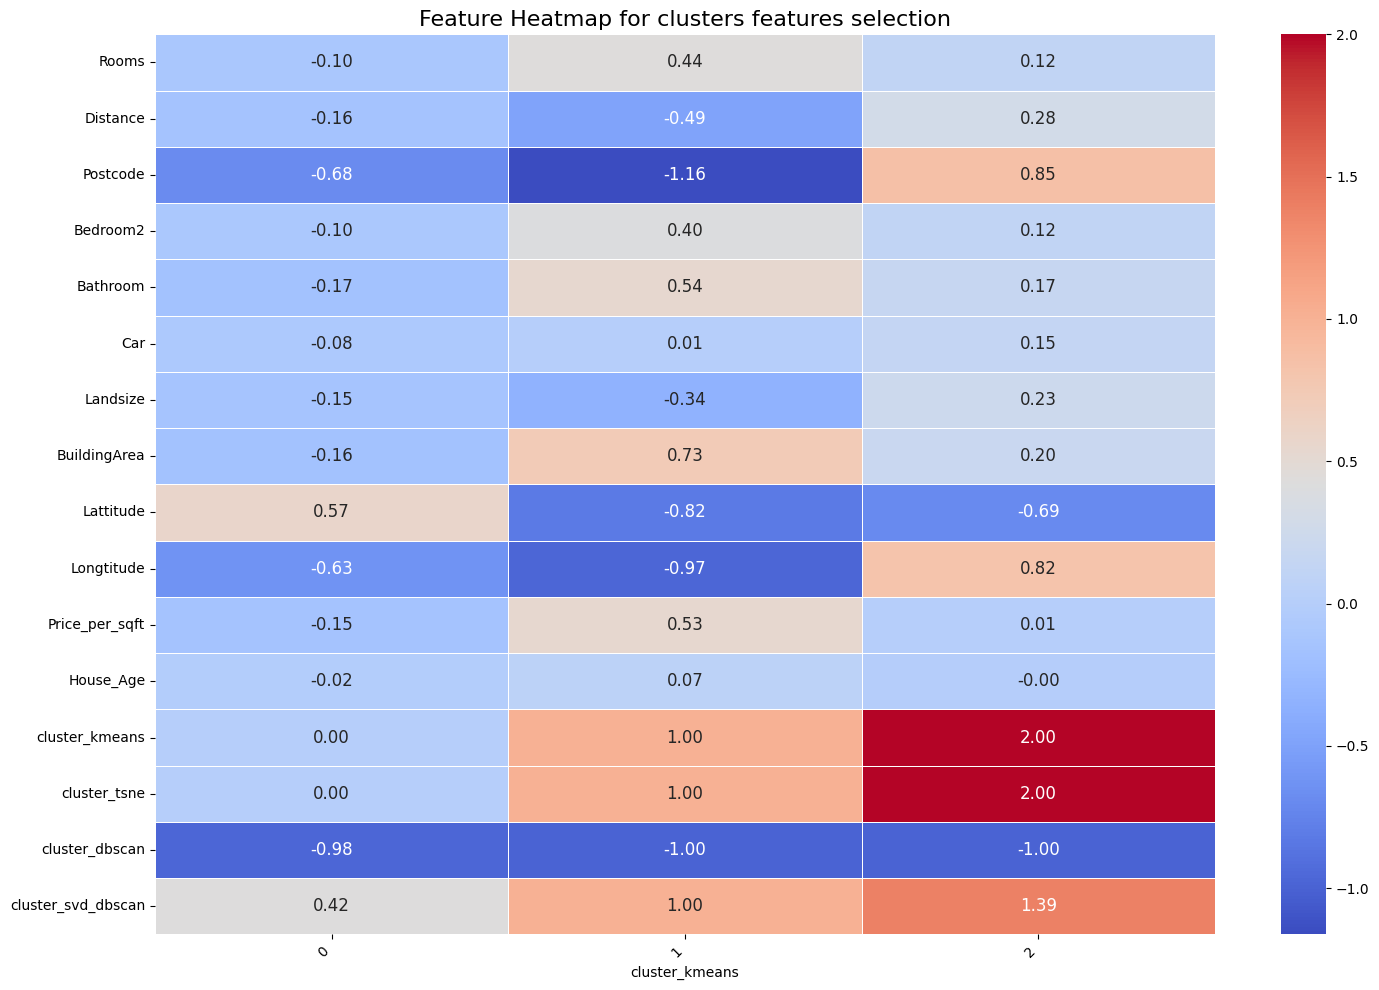

In [286]:
plt.figure(figsize=(15, 10))  # Increased figure size for better spacing

# Using a diverging colormap for better contrast
sns.heatmap(feature_for_cluster.T,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",  # Formatting annotation to 2 decimal places
            linewidths=.5, # Adding lines between cells for clarity
            annot_kws={"size": 12})  # Increasing annotation font size

plt.xticks(rotation=45, ha='right') # Rotating x-axis labels for readability
plt.yticks(rotation=0) # Making y-axis labels horizontal

plt.title('Feature Heatmap for clusters features selection', fontsize=16) # Adding a clear title with larger font size
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [305]:
feature_for_cluster_tnse = feature_df.groupby("cluster_tsne")[feature_col].mean()
feature_for_cluster_tnse

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Price_per_sqft,House_Age,cluster_kmeans,cluster_tsne,cluster_dbscan,cluster_svd_dbscan
cluster_tsne,,,,,,,,,,,,,,,,
0,-0.102977,-0.157690,-0.684718,-0.097803,-0.166186,-0.084649,-0.149284,-0.162317,0.570365,-0.626884,-0.151483,-0.021747,0.0,0.0,-0.976825,0.423329
1,0.435871,-0.490253,-1.162182,0.403542,0.542106,0.006229,-0.336660,0.731741,-0.822628,-0.969739,0.534911,0.071280,1.0,1.0,-1.000000,1.000000
2,0.119014,0.284680,0.852959,0.119052,0.168655,0.146103,0.232994,0.195245,-0.694205,0.820017,0.006331,-0.002830,2.0,2.0,-1.000000,1.386017


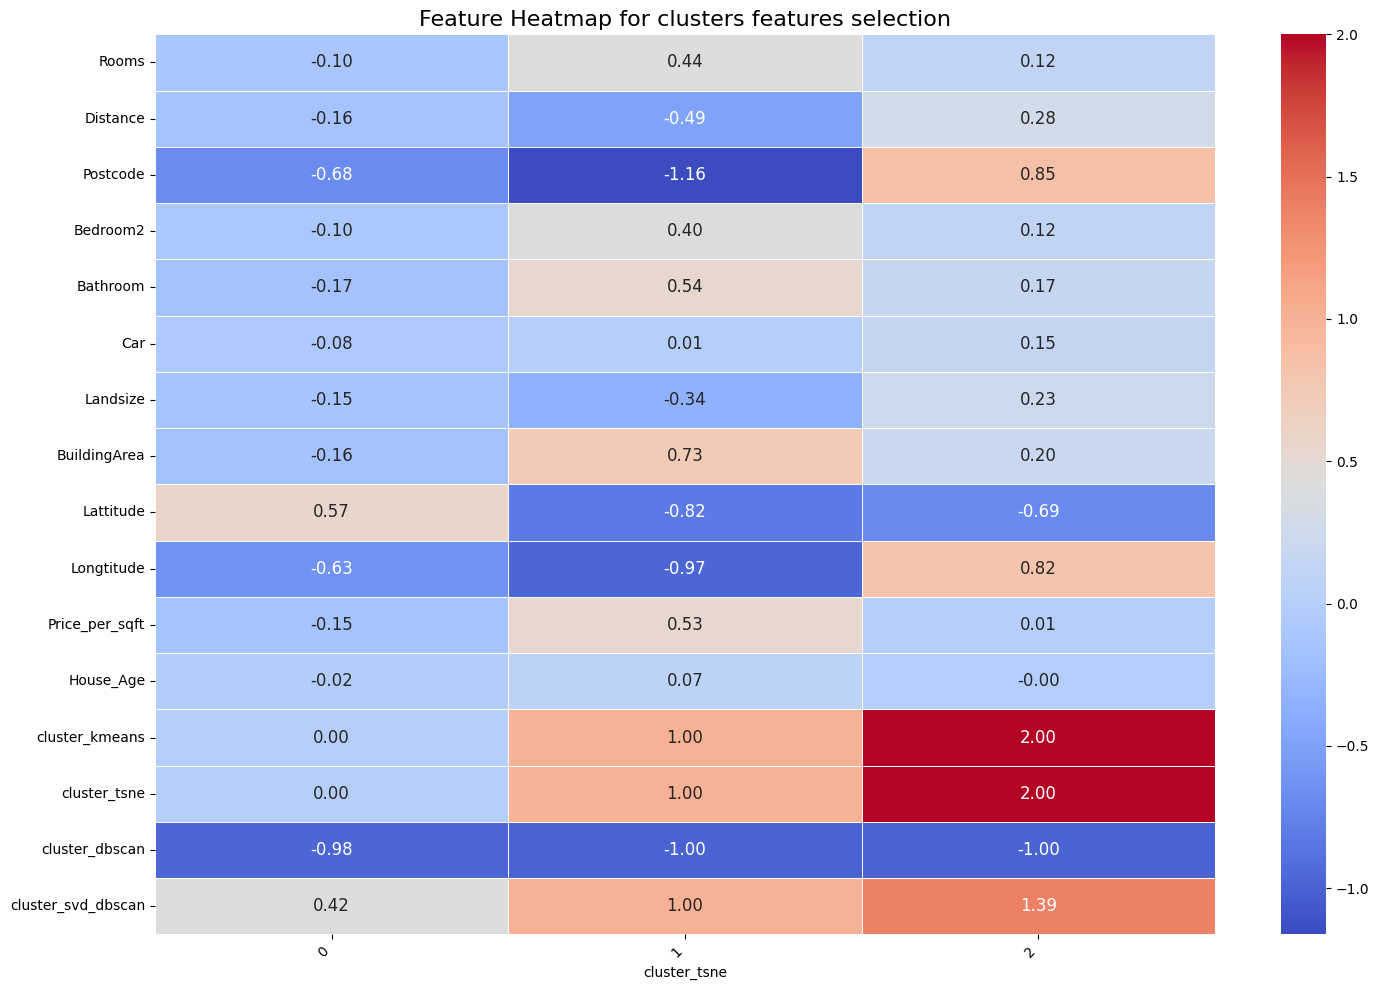

In [306]:
plt.figure(figsize=(15, 10))  # Increased figure size for better spacing

# Using a diverging colormap for better contrast
sns.heatmap(feature_for_cluster_tnse.T,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",  # Formatting annotation to 2 decimal places
            linewidths=.5, # Adding lines between cells for clarity
            annot_kws={"size": 12})  # Increasing annotation font size

plt.xticks(rotation=45, ha='right') # Rotating x-axis labels for readability
plt.yticks(rotation=0) # Making y-axis labels horizontal

plt.title('Feature Heatmap for clusters features selection', fontsize=16) # Adding a clear title with larger font size
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [307]:
feature_for_cluster_dbscan = feature_df.groupby("cluster_dbscan")[feature_col].mean()
feature_for_cluster_dbscan

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Price_per_sqft,House_Age,cluster_kmeans,cluster_tsne,cluster_dbscan,cluster_svd_dbscan
cluster_dbscan,,,,,,,,,,,,,,,,
-1,0.004475,0.029534,-0.014212,0.006798,-0.007202,0.017838,0.018477,0.007394,-0.002668,0.002457,-0.073677,-0.009240,0.887422,0.887422,-1.0,0.85473
0,-0.062608,0.593243,-0.704929,-0.026024,-0.905120,0.673701,1.023090,-0.255130,1.373910,-0.581226,-0.916170,0.000857,0.000000,0.000000,0.0,0.00000
1,-1.292191,0.266996,-0.293401,-1.248635,-0.905120,-0.698324,-1.247987,-1.213380,1.211325,0.205474,-0.207570,-0.761413,0.000000,0.000000,1.0,0.00000


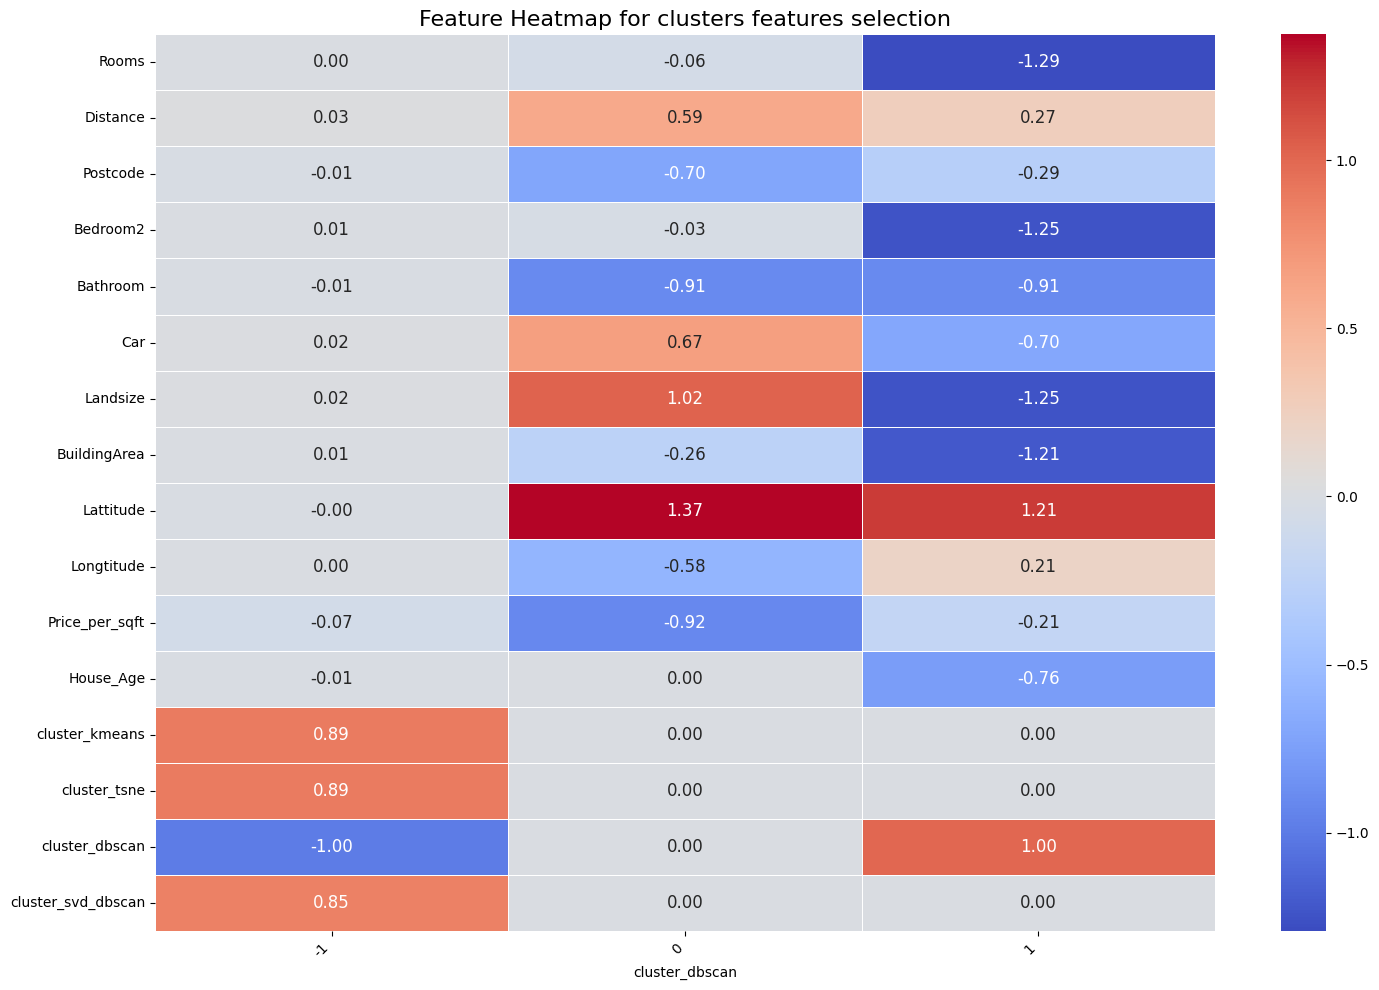

In [308]:
plt.figure(figsize=(15, 10))  # Increased figure size for better spacing

# Using a diverging colormap for better contrast
sns.heatmap(feature_for_cluster_dbscan.T,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",  # Formatting annotation to 2 decimal places
            linewidths=.5, # Adding lines between cells for clarity
            annot_kws={"size": 12})  # Increasing annotation font size

plt.xticks(rotation=45, ha='right') # Rotating x-axis labels for readability
plt.yticks(rotation=0) # Making y-axis labels horizontal

plt.title('Feature Heatmap for clusters features selection', fontsize=16) # Adding a clear title with larger font size
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [309]:
feature_for_cluster_svd_dbscan = feature_df.groupby("cluster_svd_dbscan")[feature_col].mean()
feature_for_cluster_svd_dbscan

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Price_per_sqft,House_Age,cluster_kmeans,cluster_tsne,cluster_dbscan,cluster_svd_dbscan
cluster_svd_dbscan,,,,,,,,,,,,,,,,
-1,0.456934,1.753744,0.998607,0.481962,0.340433,0.287215,0.460321,0.369973,0.177237,1.207153,-0.560931,-0.639596,1.450704,1.450704,-1.00000,-1.0
0,-0.116097,-0.036658,-0.263378,-0.105153,-0.191500,-0.060715,-0.035010,-0.189397,0.697572,0.235619,-0.130640,-0.007100,0.497613,0.497613,-0.96817,0.0
1,0.045637,-0.074861,-1.020902,0.040854,-0.011971,0.014660,-0.093942,0.015555,0.173961,-1.275506,-0.268783,-0.116021,0.031624,0.031624,-1.00000,1.0
2,0.062877,0.040713,1.003935,0.058554,0.177386,0.092000,0.126575,0.198395,-1.032409,0.605037,0.192359,0.123654,1.998630,1.998630,-1.00000,2.0


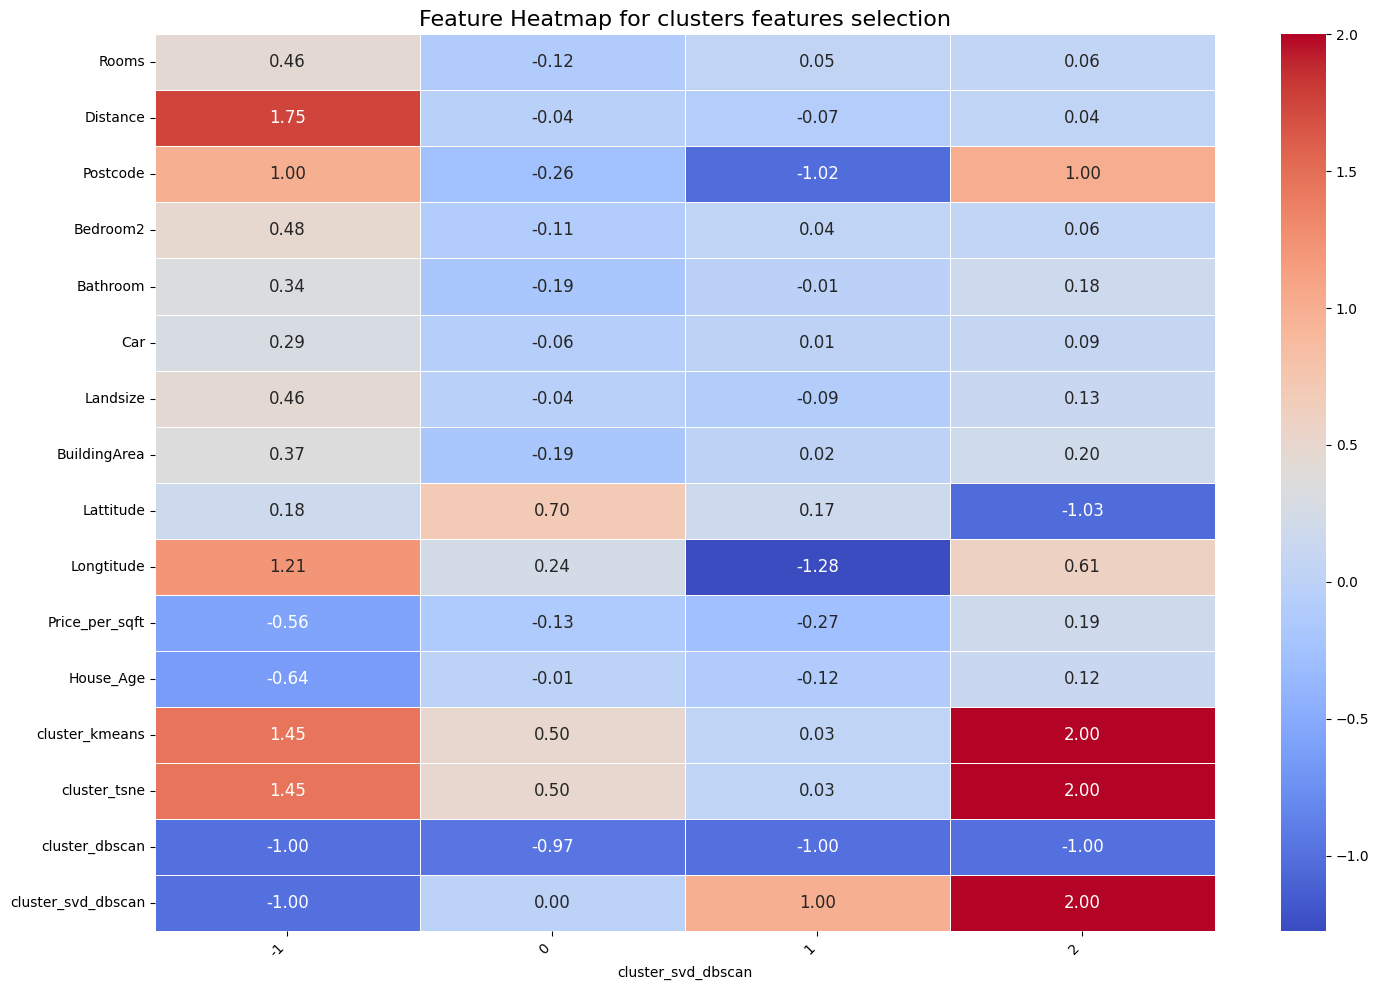

In [310]:
plt.figure(figsize=(15, 10))  # Increased figure size for better spacing

# Using a diverging colormap for better contrast
sns.heatmap(feature_for_cluster_svd_dbscan.T,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",  # Formatting annotation to 2 decimal places
            linewidths=.5, # Adding lines between cells for clarity
            annot_kws={"size": 12})  # Increasing annotation font size

plt.xticks(rotation=45, ha='right') # Rotating x-axis labels for readability
plt.yticks(rotation=0) # Making y-axis labels horizontal

plt.title('Feature Heatmap for clusters features selection', fontsize=16) # Adding a clear title with larger font size
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

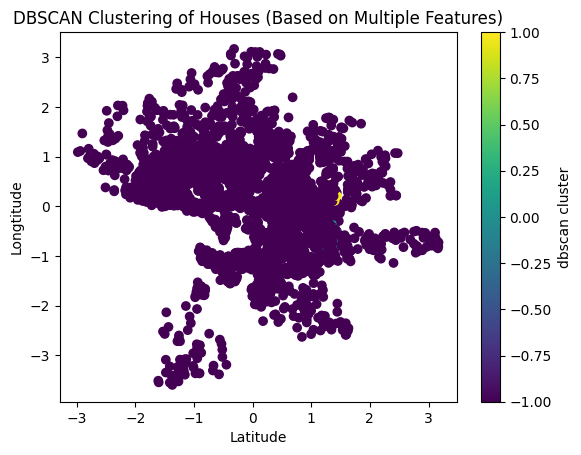

In [304]:
# Visualize the clusters based on latitude and longitude
plt.scatter(x = cleaned_df['Lattitude'], y = cleaned_df['Longtitude'], c=cleaned_df['cluster_dbscan'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.title('DBSCAN Clustering of Houses (Based on Multiple Features)')
plt.colorbar(label='dbscan cluster')
plt.show()

In [288]:
#so the conclusion:
# - based on K-means: 3 clusters
# - based on t-nse: 3 clusters
# - based on DBSCAN: 3 clusters

In [289]:
cov_matrix = np.cov(df1.T)

In [290]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues

array([ 5.38113879e+00,  4.73293627e+00,  3.80324137e+00,  3.19228910e+00,
        2.83962666e+00,  2.60104193e+00,  2.34262304e+00,  2.23727049e+00,
        2.16664342e+00,  2.10846905e+00,  2.08661931e+00,  2.03001860e+00,
        2.01647995e+00,  2.00045661e+00,  1.99349196e+00,  1.98021033e+00,
        1.96430631e+00,  1.96897923e+00,  1.94073859e+00,  1.93066189e+00,
        1.90809352e+00,  1.89856723e+00,  1.86781141e+00,  1.85911828e+00,
        1.88183565e+00,  1.79525593e+00,  1.91623555e+00,  1.49327847e-01,
        1.21291315e-01,  1.18327154e-01,  7.36351803e-03,  3.99422290e-03,
        5.18900905e-03,  9.81989806e-02,  8.66543863e-02,  8.32466529e-02,
        7.39826046e-02,  6.07874134e-02,  3.07009183e-02,  2.75521195e-02,
        5.47182668e-02,  5.17067985e-02,  4.87526168e-02,  4.75690491e-02,
        3.44633105e-02,  4.23793601e-02,  4.15067031e-02,  3.61125545e-02,
        1.87471739e-01,  1.64026265e-01,  1.66463004e-01,  1.27256276e-01,
        1.14173538e-01,  

In [291]:
eigen_df = pd.DataFrame({"Feature": df1.columns , "Eigenvalue": eigenvalues})

# Display Eigenvalues sorted from highest to lowest
eigen_df = eigen_df.sort_values(by="Eigenvalue", ascending=False)
eigen_df.head(30)

,Feature,Eigenvalue
0,Rooms,5.381139
1,Distance,4.732936
2,Postcode,3.803241
3,Bedroom2,3.192289
4,Bathroom,2.839627
5,Car,2.601042
6,Landsize,2.342623
7,BuildingArea,2.237270
8,Lattitude,2.166643
9,Longtitude,2.108469


In [295]:
eigen_df[eigen_df["Eigenvalue"]>1.5]

,Feature,Eigenvalue
0,Rooms,5.381139
1,Distance,4.732936
2,Postcode,3.803241
3,Bedroom2,3.192289
4,Bathroom,2.839627
5,Car,2.601042
6,Landsize,2.342623
7,BuildingArea,2.237270
8,Lattitude,2.166643
9,Longtitude,2.108469


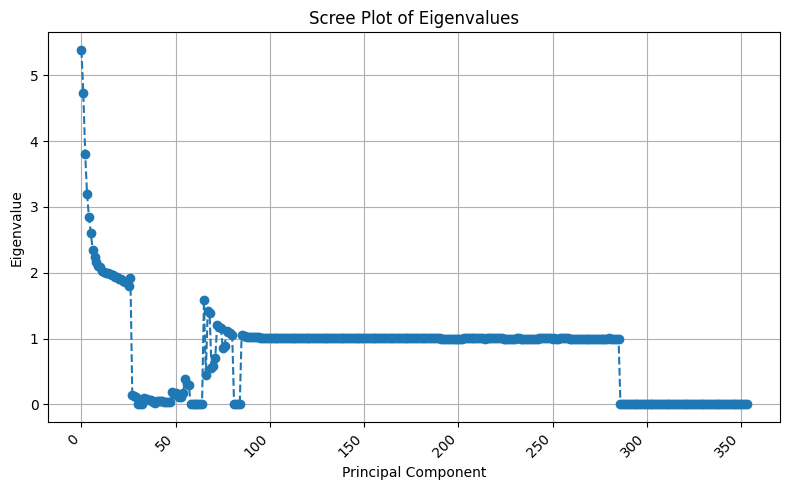

In [296]:
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
plt.plot(eigenvalues, marker="o", linestyle="--")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot of Eigenvalues")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True) # Add a grid for better visualization
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

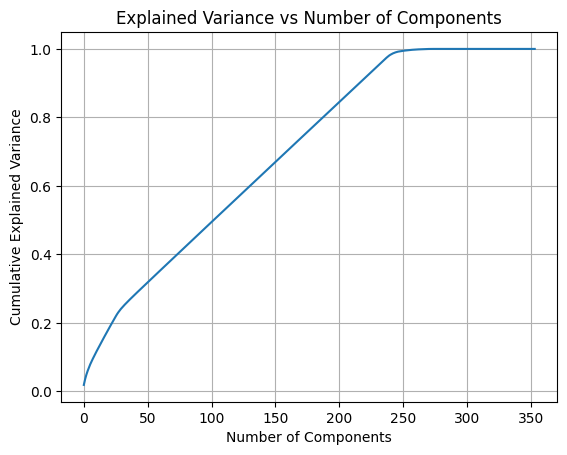

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Apply PCA without reducing components
pca = PCA().fit(df1)

# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()


In [298]:
def store_pca_components(data, n_components=238):
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(data)

    # Create a DataFrame with component names
    component_names = [f"PCA{i+1}" for i in range(n_components)]
    pca_df = pd.DataFrame(data=pca_components, columns=component_names)

    return pca_df

In [299]:
df_pca_238 = store_pca_components(df1)
df_pca_238

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA229,PCA230,PCA231,PCA232,PCA233,PCA234,PCA235,PCA236,PCA237,PCA238
0,-3.391669,3.881263,-0.747649,2.340270,1.091613,3.277787,0.710037,0.765659,-2.144769,-1.306699,...,-0.042207,-0.038074,0.035949,-0.036880,0.001974,0.008345,0.037706,-0.016671,0.015680,-0.014070
1,-1.811794,2.235478,-0.091273,4.151747,0.894444,3.138601,1.986781,1.128432,-2.092881,-1.382860,...,-0.039947,-0.037825,0.036266,-0.037293,0.001426,0.007782,0.038571,-0.016447,0.015940,-0.014068
2,-2.794842,3.171022,-0.726124,2.642592,0.865910,3.073026,0.783154,0.714737,-2.007932,-1.310049,...,-0.042936,-0.039284,0.035446,-0.036679,0.002210,0.008997,0.037788,-0.016679,0.015665,-0.014173
3,-2.663513,2.775093,-0.816766,2.630347,0.734950,2.987632,0.786180,0.676056,-2.014098,-1.287527,...,-0.041705,-0.039630,0.035110,-0.036306,0.002138,0.008450,0.037846,-0.016493,0.015875,-0.014237
4,-1.584628,1.661785,-0.439990,2.984802,0.376254,2.394132,2.422181,1.230824,-1.897893,-1.438518,...,-0.041010,-0.036899,0.035028,-0.036773,0.001860,0.008173,0.037615,-0.016332,0.015537,-0.013799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,3.750477,-2.184907,-1.537781,-0.043130,1.964586,0.902139,1.433076,0.345424,-1.006408,-0.667901,...,-0.972570,0.647588,-0.278864,-1.233862,-0.372446,0.519784,0.910403,0.164958,0.096336,0.066521
4653,-1.587847,0.272639,-2.297666,-1.004675,-0.047261,0.265427,-0.940805,-0.385783,-0.272925,0.051709,...,-0.060581,0.072771,-0.006002,0.230028,-0.036658,-0.024622,0.065048,0.027123,-0.044754,-0.006408
4654,-0.615330,-3.513739,3.246472,-0.434075,-0.760512,0.452102,-0.579579,-0.384633,-2.372505,0.815189,...,0.029068,-0.077158,0.151526,-0.028947,0.053569,-0.020948,-0.032209,-0.010572,-0.023610,-0.002290
4655,-1.172019,-1.501143,2.628375,-0.279307,0.558031,0.772266,1.154626,0.520260,-0.520613,0.319903,...,0.026049,-0.020457,0.058822,-0.005442,-0.124447,0.038285,-0.076559,0.009674,0.003495,0.006085


In [ ]:
cluster_summary = df.groupby('Cluster')['Price'].mean().sort_values()
print("Average Price by Cluster:")
print(round(cluster_summary,0))

In [ ]:
import seaborn as sns

sns.scatterplot(x=df["Landsize"], y=df["Price_per_sqft"], hue=df["Cluster"], palette="viridis")
plt.title("Best Valued Houses Clustering")
plt.show()


In [ ]:
import seaborn as sns

sns.scatterplot(x=df["Distance"], y=df["Price_per_sqft"], hue=df["Cluster"], palette="viridis")
plt.title("Best Valued Houses Clustering")
plt.show()


In [ ]:
import seaborn as sns

sns.scatterplot(x=df["House_Age"], y=df["Price_per_sqft"], hue=df["Cluster"], palette="viridis")
plt.title("Best Valued Houses Clustering")
plt.show()


In [ ]:
import seaborn as sns

sns.scatterplot(x=df["Landsize"], y=df["Price_per_sqft"], hue=df["Cluster"], palette="viridis")
plt.title("Best Valued Houses Clustering")
plt.show()


In [ ]:
# Define Melbourne CBD boundary
min_lat, max_lat = -37.819704, 144.929512 # Approximate CBD latitude range
min_lon, max_lon = -37.860103, 144.933289 # Approximate CBD longitude range

# Filter dataset for properties in Melbourne CBD
df_cbd = df[(df["Lattitude"].between(min_lat, max_lat)) &
            (df["Longtitude"].between(min_lon, max_lon))]

# Count occurrences of each cluster in the CBD
cluster_counts = df_cbd["Cluster"].value_counts()

# Display the results
print(cluster_counts)


In [ ]:
-37.819704, 144.929512
(-37.860103, 144.933289)

In [ ]:
#from sklearn.manifold import TSNE, MDS, Isomap

#mds=MDS(n_components=2).fit_transform(df_scaled)
#plt.scatter(mds[:,0],mds[:,1])

**DBSCAN Analysis **

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
cl_df = pd.read_csv("cleaned_melborn.csv")

In [ ]:
cl_df.head(1)

In [ ]:
cl_df.columns

In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

In [ ]:
cl_features = ["Landsize", "Bedroom2","Bathroom", "Distance","Car", "Price_per_sqft","House_Age"]
cl_df_selected = cl_df[cl_features]

In [ ]:
# Function to plot k-distance graph
def plot_k_distance_graph(df_minMax, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(df_minMax)
    distances, _ = neigh.kneighbors(df_minMax)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(df_minMax, k=3)

In [ ]:
knn = NearestNeighbors(n_neighbors = 14)
model = knn.fit(df_scaled2)
distances, indices = knn.kneighbors(df_scaled2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

In [ ]:
# Set up the size of the figure
plt.figure(figsize=(8, 6))

# Plot the heatmap with annotations
# diverging_palette(20, 220, n=200) makes a diverging palette between two colors in seaborn
matrix = sns.heatmap(
    cl_df_selected.corr(),
    cmap=sns.diverging_palette(20, 220, n=400),
    annot = True,
    square = True)

# Adjust lables on x-axis
matrix.set_xticklabels(
    matrix.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

plt.show()

In [ ]:
df_scaled2.shape

In [ ]:
plt.scatter(df_scaled2[:,0],df_scaled2[:,1])

In [ ]:
db = DBSCAN(eps=0.4, min_samples=10).fit(df_scaled2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b','m' , 'r', 'g', 'c', 'w']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = df_scaled2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = df_scaled2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()
